In [145]:
#EDA1_Bike Details Dataset

In [5]:
#Q1. What is the range of selling prices in the dataset?

In [9]:
#Range of Selling Prices
#To calculate the range of selling prices, we need to find the minimum and maximum values in the dataset.

#Let's assume the dataset is loaded into a Pandas DataFrame df with a column Selling Price.

In [1]:
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')
min_price = df['selling_price'].min()
max_price = df['selling_price'].max()
price_range = max_price -min_price
print(f"Minimum Selling Price:{min_price}")
print(f"Maximum Selling Price: {max_price}")
print(f"Range of Selling Prices: {price_range}")

Minimum Selling Price:5000
Maximum Selling Price: 760000
Range of Selling Prices: 755000


In [2]:
#Interpretation
#The range of selling prices provides an idea of the spread of 
#the data. A larger range indicates greater variability in selling prices,
#while a smaller range suggests more consistent prices.

In [6]:
#Q2. What is the median selling price for bikes in the dataset?

In [8]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
selling_prices = df["selling_price"].dropna()
median_price = selling_prices.median()
print(f"The median selling price for bikes in the data set is {median_price} INR.")

The median selling price for bikes in the data set is 45000.0 INR.


In [11]:
#Q3. What is the most common seller type?

In [13]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
common_seller = df["seller_type"].mode()[0]
print(f"The most common seller type is: {common_seller}")

The most common seller type is: Individual


In [16]:
#Q4. How many bikes have driven more than 50,000 kilometers?

In [18]:
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')
df_clean = df.dropna(subset=['km_driven'])
count_over_50k = df_clean[df_clean['km_driven'] > 50000].shape[0]
print(f"Number of bikes driven more than 50,000 km: {count_over_50k}")

Number of bikes driven more than 50,000 km: 170


In [21]:
#Q5. What is the average km_driven value for each ownership type?

In [23]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
df['km_driven'] = pd.to_numeric(df['km_driven'], errors='coerce')
df_clean = df.dropna(subset=['km_driven', 'owner'])
average_km_by_owner = df_clean.groupby('owner')['km_driven'].mean().round(2)
print(average_km_by_owner)
                 

owner
1st owner     32816.58
2nd owner     39288.99
3rd owner     33292.18
4th owner    311500.00
Name: km_driven, dtype: float64


In [26]:
#Q6. What proportion of bikes are from the year 2015 or older?

In [28]:
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df_clean = df.dropna(subset=['year'])
total_bikes = df_clean.shape[0]
older_bikes = df_clean[df_clean['year'] <= 2015].shape[0]
proportion = (older_bikes / total_bikes) * 100
print(f"Proportion of bikes from 2015 or older: {proportion:.2f}%")

Proportion of bikes from 2015 or older: 56.64%


In [31]:
#Q7. What is the trend of missing values across the dataset?

In [33]:
#The dataset includes bike listngs with attributes such as selling
#price, year, seller type, wner type, kilometers driven, and 
#ex-showroom price. Some records may have missing values, which could
#affect further analysis.

import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
print(missing_data)

                   Missing Values  Percentage
name                            0    0.000000
selling_price                   0    0.000000
year                            0    0.000000
seller_type                     0    0.000000
owner                           0    0.000000
km_driven                       0    0.000000
ex_showroom_price             435   40.999057


In [36]:
#Q8. What is the highest ex_showroom_price recorded, and for which bike?

In [38]:
import pandas as pd

df = pd.read_csv('BIKE DETAILS.csv')
df['ex_showroom_price'] = pd.to_numeric(df['ex_showroom_price'], errors='coerce')
max_price = df['ex_showroom_price'].max()
bike_with_max_price = df[df['ex_showroom_price'] == max_price]['name'].values[0]
print(f"The highest ex-showroom price is {max_price}, recorded for the '{bike_with_max_price}'.")

The highest ex-showroom price is 1278000.0, recorded for the 'Harley-Davidson Street Bob'.


In [41]:
#Q9. What is the total number of bikes listed by each seller type?

In [43]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
seller_counts = df["seller_type"].value_counts()
print(seller_counts)

seller_type
Individual    1055
Dealer           6
Name: count, dtype: int64


In [46]:
#Q10. What is the relationship between selling_price and km_driven for first-owner bikes?

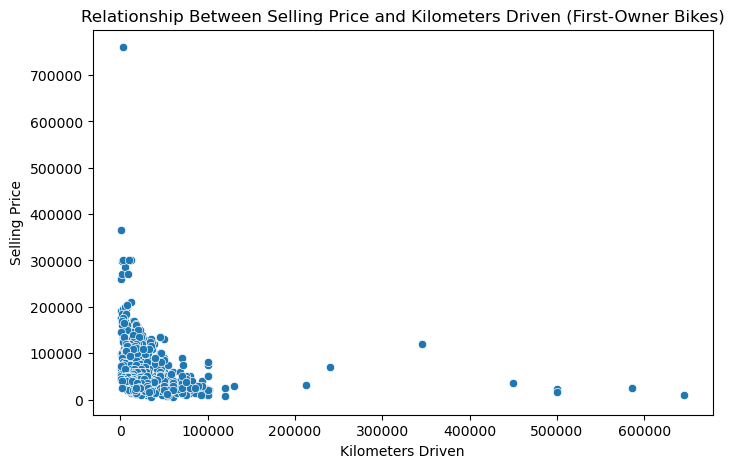

Correlation between selling price and kilometers driven: -0.24


In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")
df["km_driven"] = pd.to_numeric(df["km_driven"], errors="coerce")
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
first_owner_bikes = df[df["owner"] == "1st owner"].dropna(subset=["km_driven", "selling_price"])
correlation = first_owner_bikes["km_driven"].corr(first_owner_bikes["selling_price"])
plt.figure(figsize=(8 ,5))
sns.scatterplot(x=first_owner_bikes["km_driven"], y=first_owner_bikes["selling_price"])
plt.xlabel("Kilometers Driven")
plt.ylabel("Selling Price")
plt.title("Relationship Between Selling Price and Kilometers Driven (First-Owner Bikes)")
plt.show()
print(f"Correlation between selling price and kilometers driven: {correlation:.2f}")

In [106]:
#Q11. Identify and remove outliers in the km_driven column using the IQR method.

In [51]:
import pandas as pd
import numpy as np

df = pd.read_csv("BIKE DETAILS.csv")
df["km_driven"] = pd.to_numeric(df["km_driven"], errors="coerce")
df_clean = df.dropna(subset=["km_driven"])
Q1 = df_clean["km_driven"].quantile(0.25)
Q3 = df_clean["km_driven"].quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df_no_outliers = df_clean[(df_clean["km_driven"] >= lower_bound) & (df_clean["km_driven"] <= upper_bound)]
outliers_removed = len(df_clean) - len(df_no_outliers)
print(f"Number of outliers removed: {outliers_removed}")

Number of outliers removed: 39


In [54]:
#Q12. Perform a bivariate analysis to visualize the relationship between year and selling_price

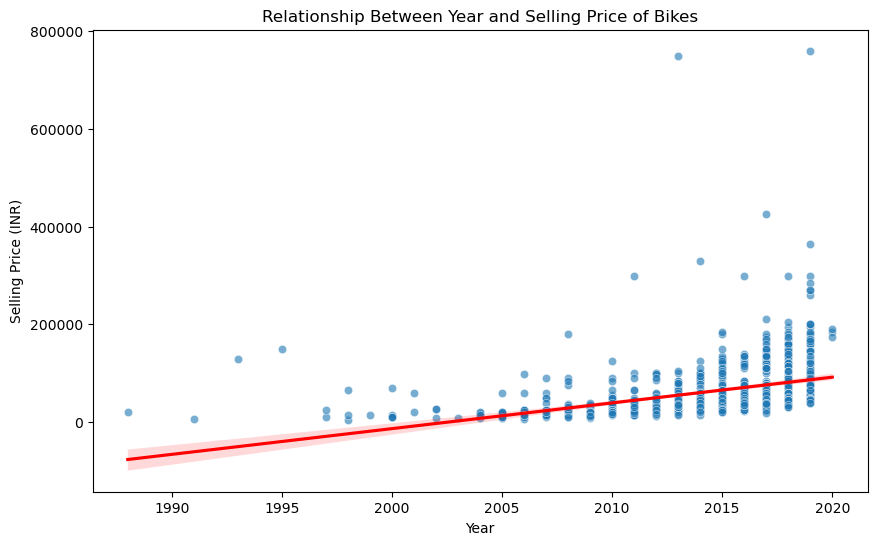

In [56]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("BIKE DETAILS.csv")
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df_clean = df.dropna(subset=["year", "selling_price"])
df_clean = df.dropna(subset=["year", "selling_price"])
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean["year"], y=df_clean["selling_price"], alpha=0.6)
sns.regplot(x=df_clean["year"], y=df_clean["selling_price"], scatter=False, color="red")
plt.xlabel("Year")
plt.ylabel("Selling Price (INR)")
plt.title("Relationship Between Year and Selling Price of Bikes")
plt.show()

In [59]:
#Q13.What is the average depreciation in selling price based on the bike's age (current year - manufacturing year)?

In [61]:
import pandas as pd

df = pd.read_csv("BIKE DETAILS.csv")
current_year = 2025
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df_clean = df.dropna(subset=["year", "selling_price"])
df_clean["bike_age"] = current_year - df_clean["year"]
depreciation_rate = (df_clean.groupby("bike_age")["selling_price"].mean()).diff().mean()
print(f"Average depreciation in selling price per year: {depreciation_rate:.2f}")
                     

Average depreciation in selling price per year: -6049.38


In [63]:
#Q14. Which bike names are priced significantly above the average price for their manufacturing year?

In [65]:
import pandas as pd
df = pd.read_csv("BIKE DETAILS.csv")
df["year"] = pd.to_numeric(df["year"], errors="coerce")
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df_clean = df.dropna(subset=["year", "selling_price"])
average_prices = df_clean.groupby("year")["selling_price"].mean()
threshold_multiplier = 1.5
df_clean["above_avg"] = df_clean.apply(
    lambda row: row["selling_price"] > threshold_multiplier * average_prices[row["year"]], axis=1)
high_price_bikes = df_clean[df_clean["above_avg"]][["name", "year", "selling_price"]]
print(high_price_bikes)

                                     name  year  selling_price
2     Royal Enfield Classic Gunmetal Grey  2018         150000
7    Royal Enfield Bullet 350 [2007-2011]  2008         180000
13                          Yamaha YZF R3  2019         365000
18    Royal Enfield Classic Gunmetal Grey  2018         150000
23                          Jawa Standard  2019         180000
..                                    ...   ...            ...
979             Royal Enfield Thunder 500  2015         105000
981             Royal Enfield Thunder 350  2013         105000
983             Royal Enfield Classic 350  2015         100000
984             Royal Enfield Classic 500  2014          95000
985             Royal Enfield Classic 500  2011          90000

[157 rows x 3 columns]


In [68]:
#Q15.Develop a correlation matrix for numeric columns and visualize it using a heatmap.

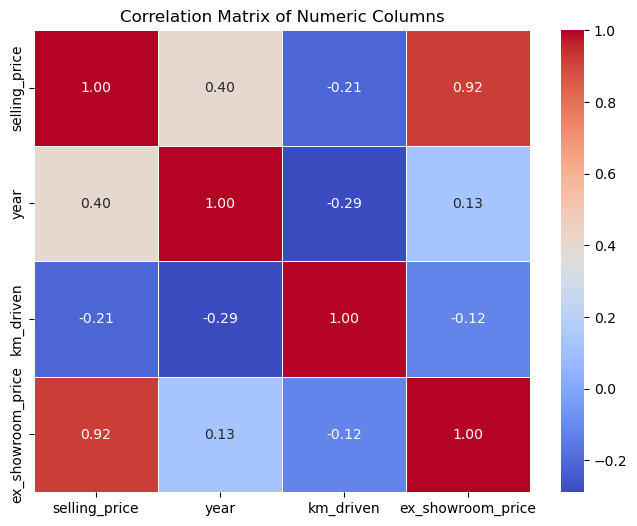

In [70]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("BIKE DETAILS.csv")
numeric_cols = ["selling_price", "year", "km_driven", "ex_showroom_price"]
df_numeric = df[numeric_cols].apply(pd.to_numeric, errors="coerce")
correlation_matrix = df_numeric.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

In [74]:
#EDA2_Car Sales

In [76]:
#Q1.What is the average selling price of cars for each dealer, and how does it compare across different dealers?

Dealer_Name
Buddy Storbeck's Diesel Service Inc                27217.26
C & M Motors Inc                                   28111.76
Capitol KIA                                        28189.70
Chrysler Plymouth                                  27555.53
Chrysler of Tri-Cities                             28123.09
Classic Chevy                                      28602.01
Clay Johnson Auto Sales                            27816.03
Diehl Motor CO Inc                                 27993.93
Enterprise Rent A Car                              28312.58
Gartner Buick Hyundai Saab                         28247.62
Hatfield Volkswagen                                27853.71
Iceberg Rentals                                    28522.96
McKinney Dodge Chrysler Jeep                       27684.10
Motor Vehicle Branch Office                        27956.74
Nebo Chevrolet                                     27818.89
New Castle Ford Lincoln Mercury                    27867.13
Pars Auto Sales             

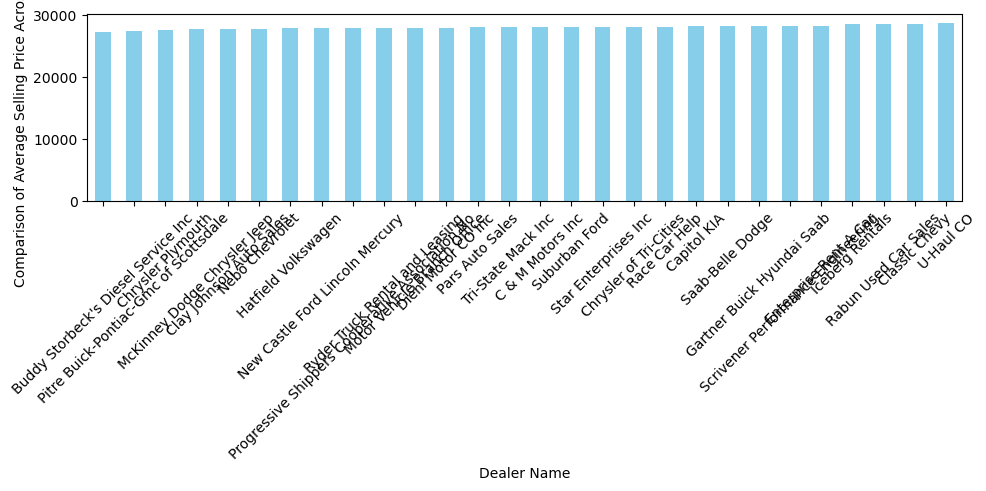

In [98]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
average_price_per_dealer = df.groupby("Dealer_Name")["selling_price"].mean().round(2)
print(average_price_per_dealer)
plt.figure(figsize=(10, 5))
average_price_per_dealer.sort_values().plot(kind="bar", color="skyblue")
plt.xlabel("Dealer Name")
plt.ylabel("Comparison of Average Selling Price Across Dealers")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [100]:
#Q2. Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?

Car brand with the highest price variation: Lincoln (Std Dev: 19658.05)
Company
Lincoln       19658.05
Saab          19653.74
Cadillac      19517.12
Plymouth      19066.00
Lexus         17852.92
Buick         17142.23
Mercury       16445.17
Nissan        16214.26
Saturn        15990.22
Ford          15849.09
Mercedes-B    15722.81
Oldsmobile    15711.35
Toyota        15367.13
BMW           15065.58
Pontiac       14348.96
Infiniti      13696.33
Chevrolet     13311.06
Volvo         12933.79
Subaru        12920.77
Audi          12904.24
Volkswagen    12527.12
Mitsubishi    11671.34
Chrysler      11583.29
Dodge         11187.59
Honda         11148.63
Jaguar        10222.53
Jeep           9459.83
Acura          8183.05
Porsche        5261.84
Hyundai        3485.98
Name: selling_price, dtype: float64


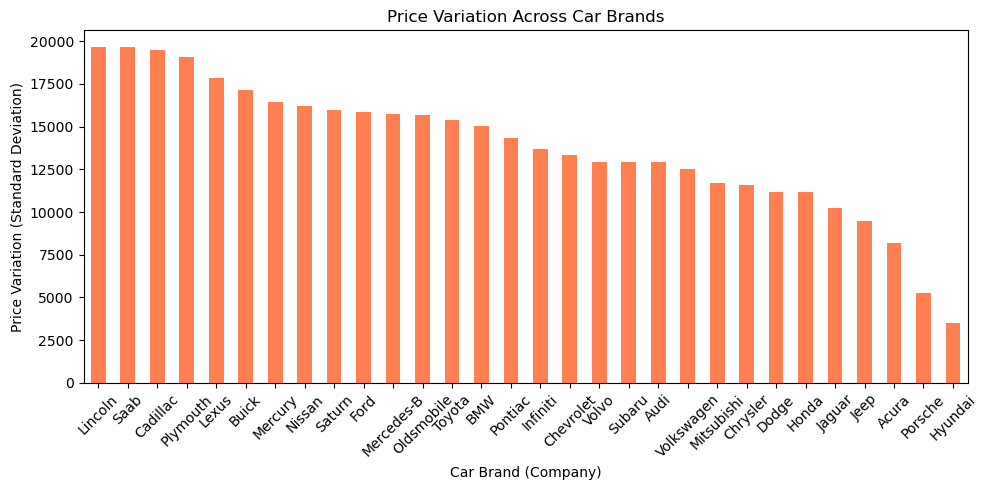

In [106]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
price_variation = df.groupby("Company")["selling_price"].std().round(2)
highest_variation_brand = price_variation.idxmax()
highest_variation_value = price_variation.max()
print(f"Car brand with the highest price variation: {highest_variation_brand} (Std Dev: {highest_variation_value})")
print(price_variation.sort_values(ascending=False))
plt.figure(figsize=(10, 5))
price_variation.sort_values(ascending=False).plot(kind="bar", color="coral")
plt.xlabel("Car Brand (Company)")
plt.ylabel("Price Variation (Standard Deviation)")
plt.title("Price Variation Across Car Brands")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [108]:
#Q3. What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare

                 0.25     0.75      IQR
Transmission                           
Auto          19000.0  35500.0  16500.0
Manual        17000.0  34000.0  17000.0


C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\3881262309.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean["Transmission"], y=df_clean["selling_price"], palette="coolwarm")


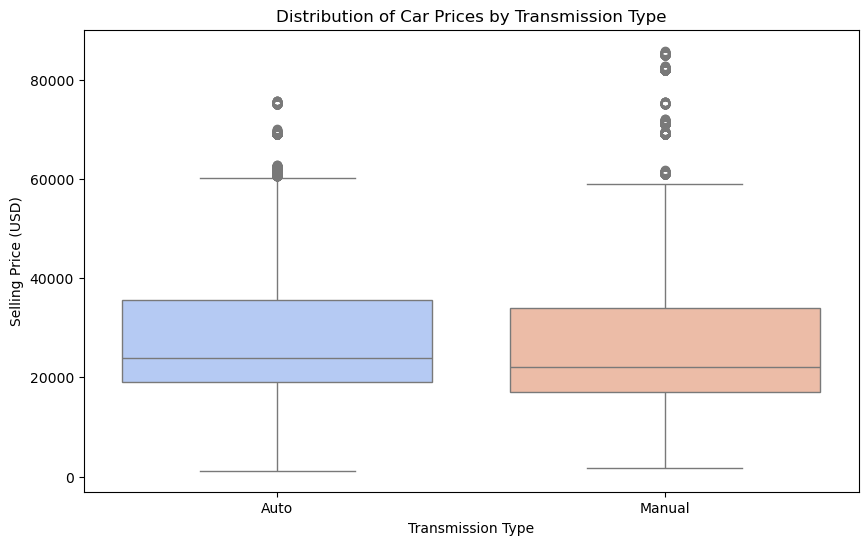

In [116]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df_clean = df.dropna(subset=["Transmission", "selling_price"])
iqr_values = df_clean.groupby("Transmission")["selling_price"].quantile([0.25, 0.75]).unstack()
iqr_values["IQR"] = iqr_values[0.75] - iqr_values[0.25]
print(iqr_values)
plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean["Transmission"], y=df_clean["selling_price"], palette="coolwarm")
plt.xlabel("Transmission Type")
plt.ylabel("Selling Price (USD)")
plt.title("Distribution of Car Prices by Transmission Type")
plt.show()

In [119]:
#Q4. What is the distribution of car prices across different regions?

C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\1610328978.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean["Dealer_Region"], y=df_clean["selling_price"], palette="coolwarm")


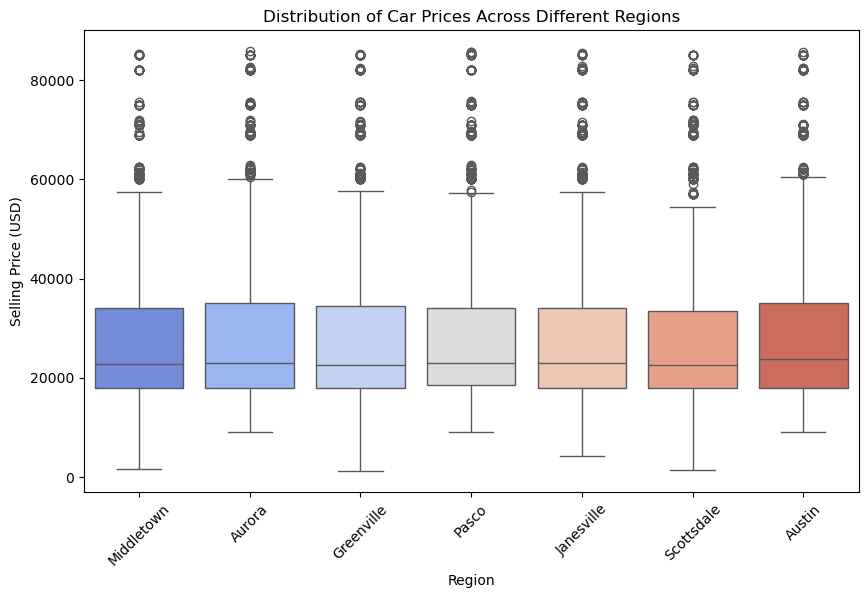

In [133]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df_clean = df.dropna(subset=["Dealer_Region", "selling_price"])
plt.figure(figsize=(10,6))
sns.boxplot(x=df_clean["Dealer_Region"], y=df_clean["selling_price"], palette="coolwarm")
plt.xlabel("Region")
plt.ylabel("Selling Price (USD)")
plt.title("Distribution of Car Prices Across Different Regions")
plt.xticks(rotation=45)
plt.show()

In [136]:
#Q5. What is the distribution of cars based on body styles?

Body Style
SUV          6374
Hatchback    6128
Sedan        4488
Passenger    3945
Hardtop      2971
Name: count, dtype: int64


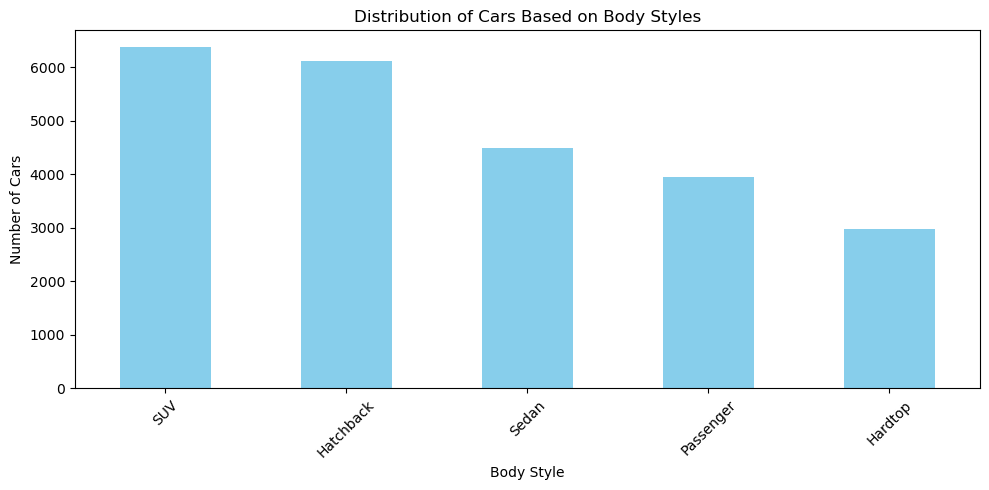

In [138]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
body_style_counts = df["Body Style"].value_counts()
print(body_style_counts)
plt.figure(figsize=(10, 5))
body_style_counts.plot(kind="bar", color="skyblue")
plt.xlabel("Body Style")
plt.ylabel("Number of Cars")
plt.title("Distribution of Cars Based on Body Styles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [141]:
#Q6. How does the average selling price of cars vary by customer gender and annual income?

C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\2681603211.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_income = df_clean.groupby("income_category")["selling_price"].mean().round(2)
C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\2681603211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean["income_category"], y=df_clean["selling_price"], palette="coolwarm")


Average Selling Price by Gender:
 Gender
Female    28277.27
Male      28039.43
Name: selling_price, dtype: float64

Average Selling Price by Annual Income Bracket:
 income_category
Low          27884.30
Lower-Mid    43000.00
Middle       22833.67
Upper-Mid    28602.54
High         28011.73
Name: selling_price, dtype: float64


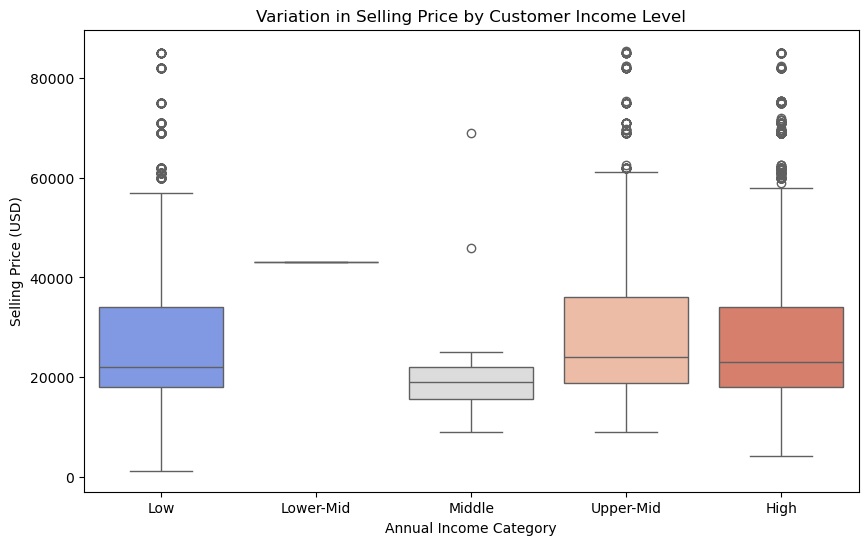

In [149]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns ={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df["Annual Income"] = pd.to_numeric(df["Annual Income"], errors="coerce")
df_clean = df.dropna(subset=["Gender", "Annual Income", "selling_price"])
avg_price_gender = df_clean.groupby("Gender")["selling_price"].mean().round(2)
income_bins = [0, 50000, 100000, 200000, 500000, 1000000]
income_labels = ["Low", "Lower-Mid", "Middle", "Upper-Mid", "High"]
df_clean["income_category"] = pd.cut(df_clean["Annual Income"], bins=income_bins, labels=income_labels)
avg_price_income = df_clean.groupby("income_category")["selling_price"].mean().round(2)
print("Average Selling Price by Gender:\n", avg_price_gender)
print("\nAverage Selling Price by Annual Income Bracket:\n", avg_price_income)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean["income_category"], y=df_clean["selling_price"], palette="coolwarm")
plt.xlabel("Annual Income Category")
plt.ylabel("Selling Price (USD)")
plt.title("Variation in Selling Price by Customer Income Level")
plt.show()

In [152]:
#Q7.What is the distribution of car prices by region, and how does the number of cars sold vary by region?

Average Car Price by Region:
 Dealer_Region
Aurora        28334.63
Austin        28341.60
Greenville    28180.82
Janesville    27833.35
Middletown    27856.34
Pasco         28119.04
Scottsdale    27954.96
Name: selling_price, dtype: float64

Number of Cars Sold by Region:
 Dealer_Region
Austin        4135
Janesville    3821
Scottsdale    3433
Pasco         3131
Aurora        3130
Middletown    3128
Greenville    3128
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\1205174459.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_clean["Dealer_Region"], y=df_clean["selling_price"], palette="coolwarm")


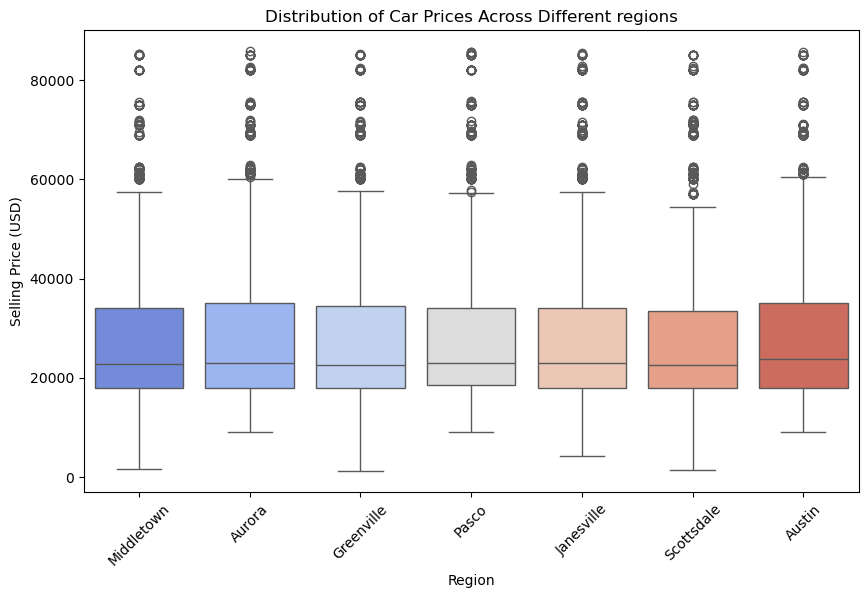

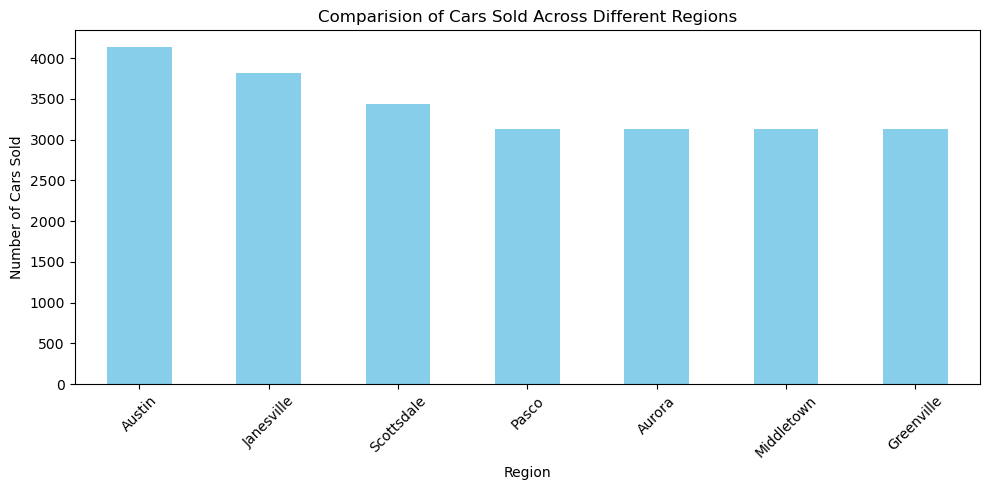

In [156]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df_clean = df.dropna(subset=["Dealer_Region", "selling_price"])
avg_price_region = df_clean.groupby("Dealer_Region")["selling_price"].mean().round(2)
cars_sold_per_region = df_clean["Dealer_Region"].value_counts()
print("Average Car Price by Region:\n", avg_price_region)
print("\nNumber of Cars Sold by Region:\n", cars_sold_per_region)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_clean["Dealer_Region"], y=df_clean["selling_price"], palette="coolwarm")
plt.xlabel("Region")
plt.ylabel("Selling Price (USD)")
plt.title("Distribution of Car Prices Across Different regions")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 5))
cars_sold_per_region.sort_values(ascending=False).plot(kind="bar", color="skyblue")
plt.xlabel("Region")
plt.ylabel("Number of Cars Sold")
plt.title("Comparision of Cars Sold Across Different Regions")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [159]:
#Q8.How does the average car price differ between cars with different engine sizes?

Average Selling Price by Engine Type:
 Engine
DoubleÂ Overhead Camshaft    28248.53
Overhead Camshaft            27914.71
Name: selling_price, dtype: float64


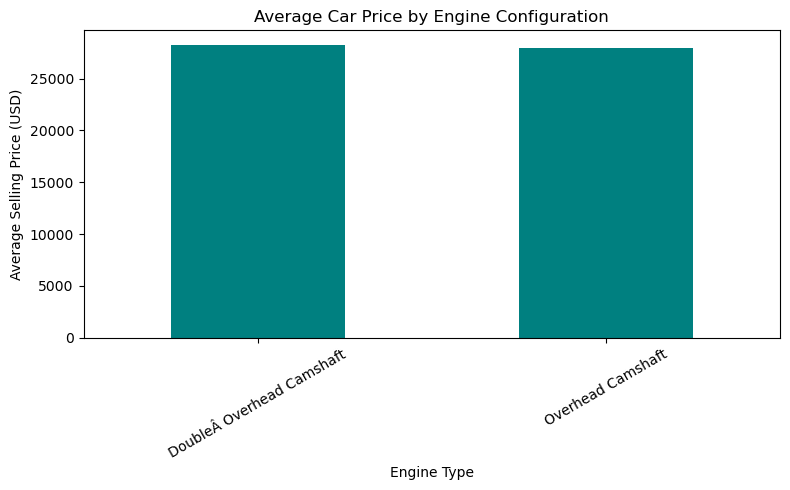

In [187]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df_clean = df.dropna(subset=["Engine", "selling_price"])
avg_price_by_engine_type = df_clean.groupby("Engine")["selling_price"].mean().round(2)
print("Average Selling Price by Engine Type:\n", avg_price_by_engine_type)
plt.figure(figsize=(8, 5))
avg_price_by_engine_type.plot(kind="bar", color="teal")
plt.title("Average Car Price by Engine Configuration")
plt.xlabel("Engine Type")
plt.ylabel("Average Selling Price (USD)")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()

In [190]:
#Q9. How do car prices vary based on the customer’s annual income bracket?

C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\170489983.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_price_by_income = df_clean.groupby("income_bracket")["selling_price"].mean().round(2)


Average Car Price by Income Bracket:
 income_bracket
<50k         27884.30
50k-100k     43000.00
100k-200k    22833.67
200k-500k    28602.54
500k-1M      28011.73
>1M          28186.20
Name: selling_price, dtype: float64


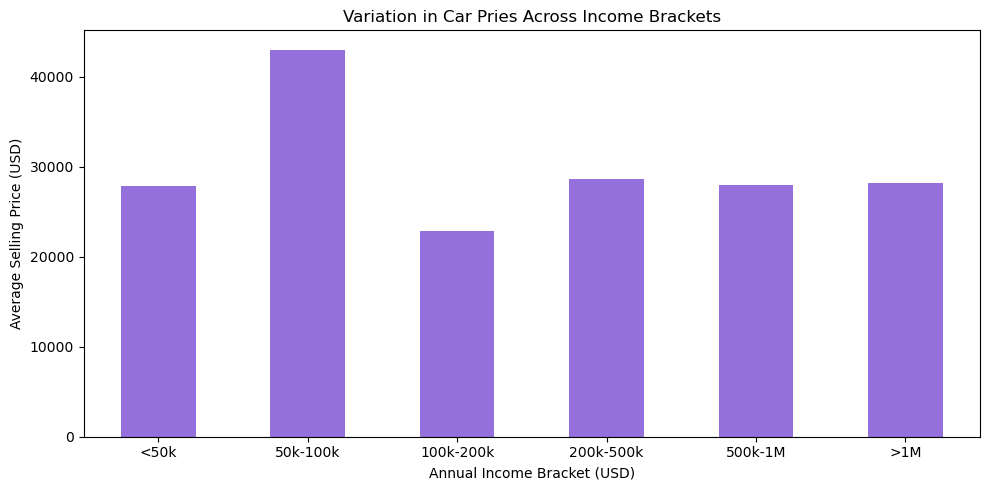

In [194]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df["Annual Income"] = pd.to_numeric(df["Annual Income"], errors="coerce")
df_clean = df.dropna(subset=["Annual Income", "selling_price"])
bins = [0, 50000, 100000, 200000, 500000, 1000000, float("inf")]
labels = ["<50k", "50k-100k", "100k-200k", "200k-500k", "500k-1M", ">1M"]
df_clean["income_bracket"] = pd.cut(df_clean["Annual Income"], bins=bins, labels=labels)

avg_price_by_income = df_clean.groupby("income_bracket")["selling_price"].mean().round(2)

print("Average Car Price by Income Bracket:\n", avg_price_by_income)
plt.figure(figsize=(10, 5))
avg_price_by_income.plot(kind="bar", color="mediumpurple")
plt.xlabel("Annual Income Bracket (USD)")
plt.ylabel("Average Selling Price (USD)")
plt.title("Variation in Car Pries Across Income Brackets")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [197]:
#Q10.What are the top 5 car models with the highest number of sales, and how does their price distribution look?

Top 5 Car Models by Sales:
 Model
Diamante      418
Silhouette    411
Prizm         411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_2840\3100274624.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_top_models["Model"], y=df_top_models["selling_price"], palette="coolwarm")


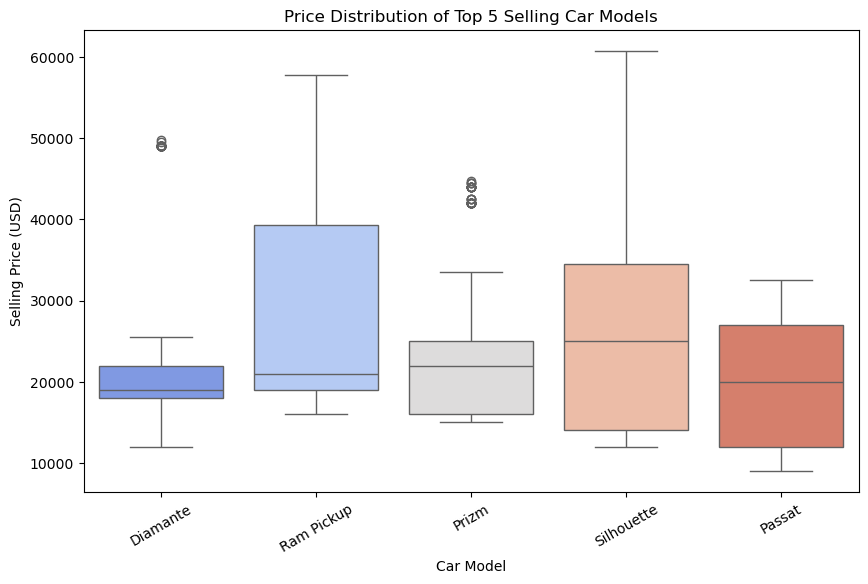

In [199]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df_clean = df.dropna(subset=["Model", "selling_price"])
top_models = df_clean["Model"].value_counts().nlargest(5)
top_models_list = top_models.index.tolist()
df_top_models = df_clean[df_clean["Model"].isin(top_models_list)]
print("Top 5 Car Models by Sales:\n", top_models)
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_top_models["Model"], y=df_top_models["selling_price"], palette="coolwarm")
plt.xlabel("Car Model")
plt.ylabel("Selling Price (USD)")
plt.title("Price Distribution of Top 5 Selling Car Models")
plt.xticks(rotation=30)
plt.show()

In [202]:
#Q11. How does car price vary with engine size across different car colors, and which colors have the highest price variation?

Prie Variation by Car Color:
 Color
Black         15286.07
Pale White    14077.35
Red           15519.36
Name: selling_price, dtype: float64

 Color with Highest Price Variation: Red (Std Dev: 15519.36)


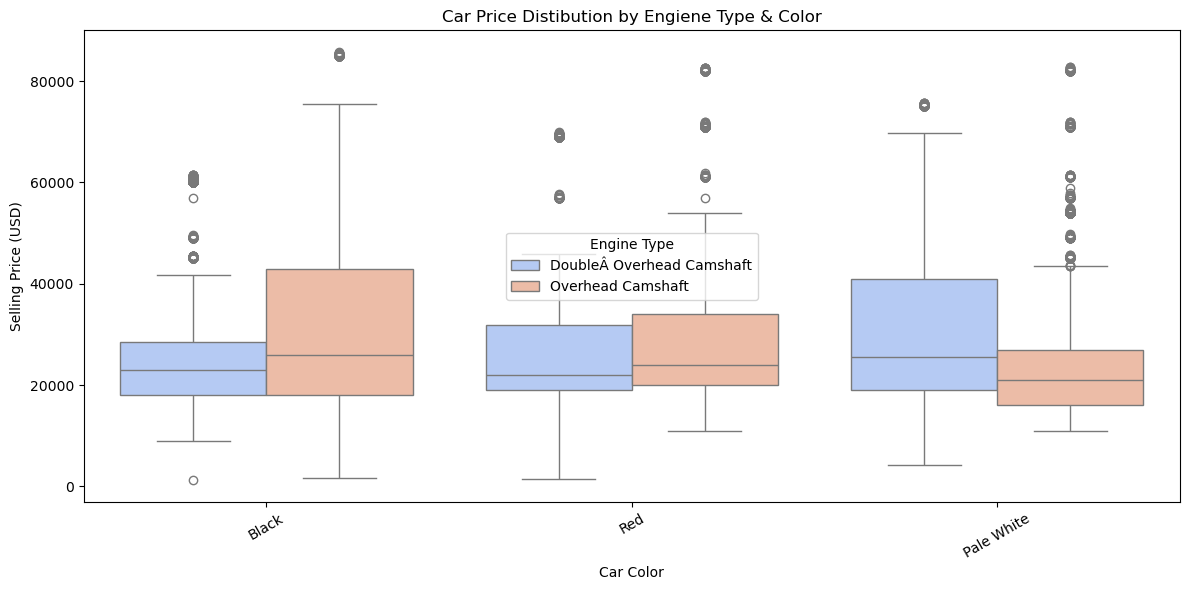

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df_clean = df.dropna(subset=["Engine", "Color", "selling_price"])
price_variation_by_color = df_clean.groupby("Color")["selling_price"].std().round(2)

if not price_variation_by_color.empty:
    highest_variation_color = price_variation_by_color.idxmax()
    highest_variation_value = price_variation_by_color.max()
    print("Prie Variation by Car Color:\n", price_variation_by_color)
    print(f"\n Color with Highest Price Variation: {highest_variation_color} (Std Dev: {highest_variation_value})")
else:
    print("No data available to compute price variation by color.")

plt.figure(figsize=(12, 6))
sns.boxplot(x="Color", y="selling_price", hue="Engine", data=df_clean, palette="coolwarm")
plt.xlabel("Car Color")
plt.ylabel("Selling Price (USD)")
plt.title("Car Price Distibution by Engiene Type & Color")
plt.xticks(rotation=30)
plt.legend(title="Engine Type")
plt.tight_layout()
plt.show()

In [28]:
#Q12. Is there any seasonal trend in car sales based on the date of sale?

C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\3782711533.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Month", y="Total Sales", data=monthly_sales, palette="viridis")


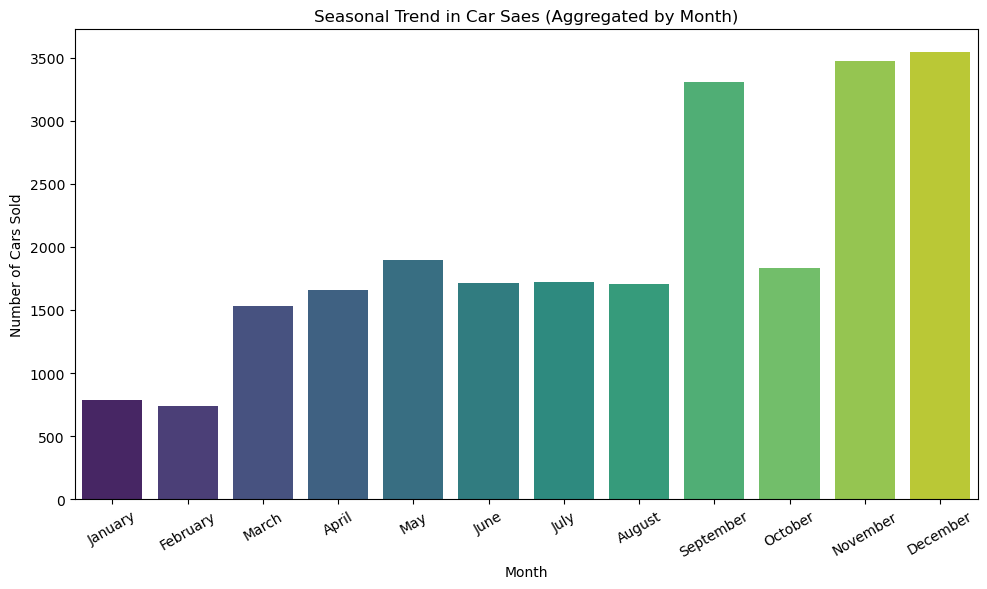

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df["Date"] = pd.to_datetime(df["Date"], errors= "coerce")
df = df.dropna(subset=["Date"])
df["Month"] = df["Date"].dt.month_name()
df["Month_Num"] = df["Date"].dt.month
df["Year"] = df["Date"].dt.year
monthly_sales = df.groupby("Month_Num").size().reset_index(name="Total Sales")
monthly_sales["Month"] = monthly_sales["Month_Num"].apply(lambda x: pd.to_datetime(str(x), format='%m').strftime('%B'))
monthly_sales = monthly_sales.sort_values("Month_Num")
plt.figure(figsize=(10, 6))
sns.barplot(x="Month", y="Total Sales", data=monthly_sales, palette="viridis")
plt.xticks(rotation=30)
plt.title("Seasonal Trend in Car Saes (Aggregated by Month)")
plt.ylabel("Number of Cars Sold")
plt.xlabel("Month")
plt.tight_layout()
plt.show()

In [43]:
#Q13. How does the car price distribution change when considering different combinations of body style and transmission type?

C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\4188556378.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Body_Trans", y="selling_price", data=df_clean, palette="pastel")


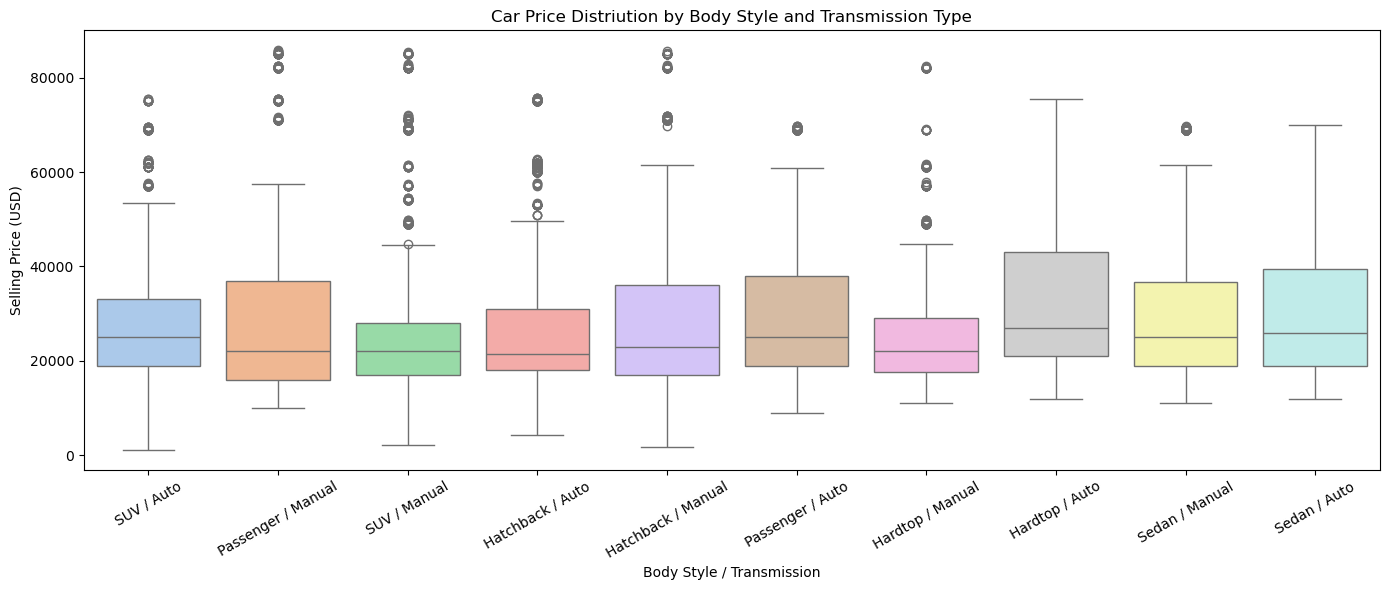

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df_clean = df.dropna(subset=["Body Style", "Transmission", "selling_price"])
df_clean["Body_Trans"] = df_clean["Body Style"] + " / " + df_clean["Transmission"]
plt.figure(figsize=(14, 6))
sns.boxplot(x="Body_Trans", y="selling_price", data=df_clean, palette="pastel")
plt.xticks(rotation=30)
plt.title("Car Price Distriution by Body Style and Transmission Type")
plt.xlabel("Body Style / Transmission")
plt.ylabel("Selling Price (USD)")
plt.tight_layout()
plt.show()
                                    

In [62]:
#14.What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?

C:\Users\Admin\AppData\Local\Temp\ipykernel_6164\3863161564.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Engine", y="selling_price", data=df_clean, palette="coolwarm")


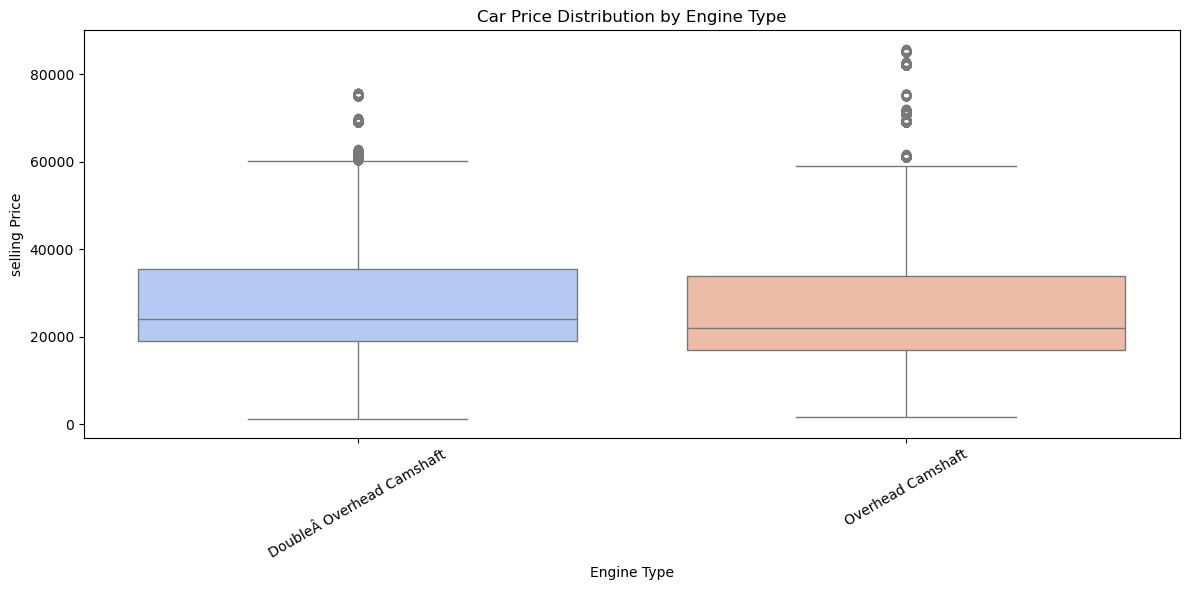

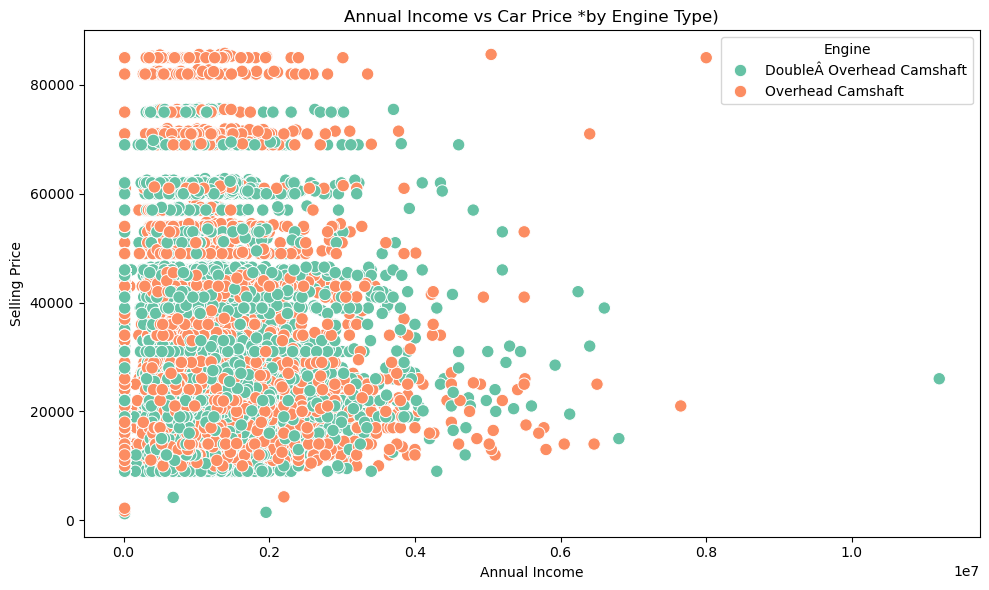

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df["Annual Income"] = pd.to_numeric(df["Annual Income"], errors="coerce")
df_clean = df.dropna(subset=["selling_price", "Annual Income", "Engine"])
plt.figure(figsize=(12, 6))
sns.boxplot(x="Engine", y="selling_price", data=df_clean, palette="coolwarm")
plt.title("Car Price Distribution by Engine Type")
plt.ylabel("selling Price")
plt.xlabel("Engine Type")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df_clean,
    x="Annual Income",
    y="selling_price",
    hue="Engine",
    palette="Set2",
    s=80
)
plt.title("Annual Income vs Car Price *by Engine Type)")
plt.xlabel("Annual Income")
plt.ylabel("Selling Price")
plt.tight_layout()
plt.show()


In [87]:
#Q15. How does the average car price vary across different car models and engine types?

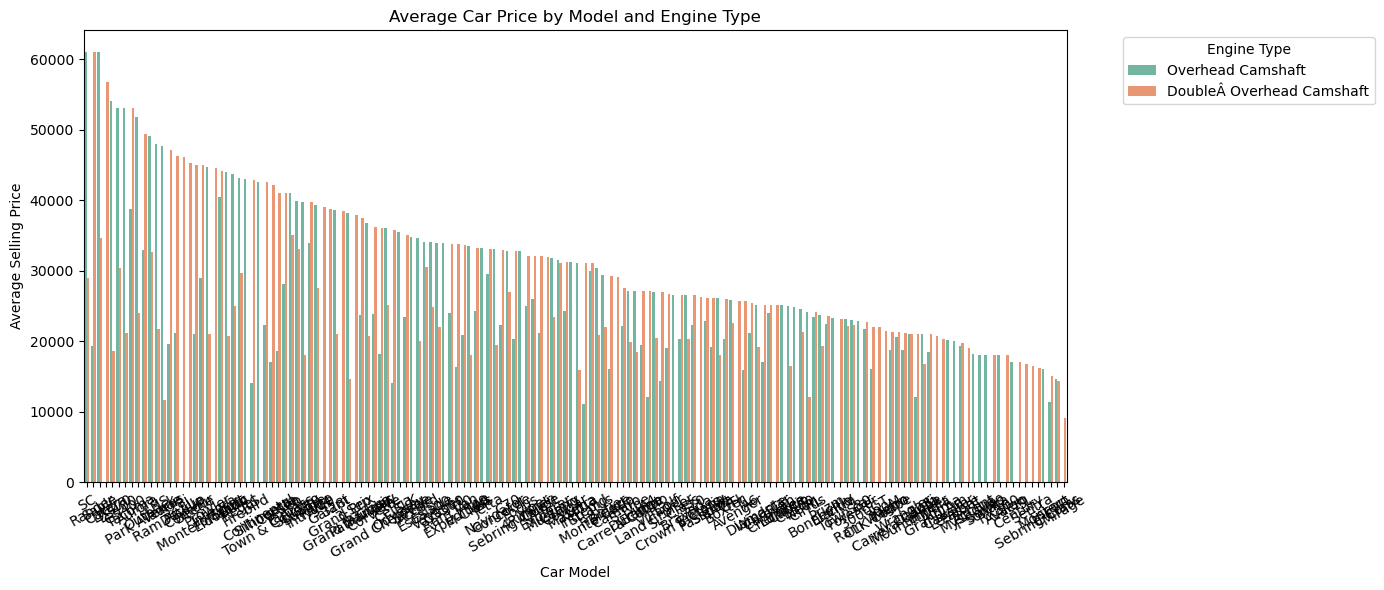

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("Car Sale.csv")
df.columns = df.columns.str.strip()
df.rename(columns={"Price ($)": "selling_price"}, inplace=True)
df["selling_price"] = pd.to_numeric(df["selling_price"], errors="coerce")
df = df.dropna(subset=["Model", "Engine", "selling_price"])
avg_price = df.groupby(["Model", "Engine"])["selling_price"].mean().reset_index()
avg_price["selling_price"] = avg_price["selling_price"].round(2)
avg_price = avg_price.sort_values("selling_price", ascending=False)
plt.figure(figsize=(14, 6))
sns.barplot(
    data=avg_price,
    x="Model",
    y="selling_price",
    hue="Engine",
    palette="Set2"
)
plt.title("Average Car Price by Model and Engine Type")
plt.xlabel("Car Model")
plt.ylabel("Average Selling Price")
plt.xticks(rotation=30)
plt.legend(title="Engine Type", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [95]:
#EDA3 - Amazon Datasets

In [99]:
#Q1. What is the average rating for each product category?

In [109]:
import pandas as pd

df = pd.read_csv("amazon.csv")
df.columns = df.columns.str.strip()
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df_clean = df.dropna(subset=["category", "rating"])
avg_rating = df_clean.groupby("category")["rating"].mean().reset_index()
avg_rating["rating"] = avg_rating["rating"].round(2)
print(avg_rating)

                                              category  rating
0    Car&Motorbike|CarAccessories|InteriorAccessori...    3.80
1    Computers&Accessories|Accessories&Peripherals|...    4.15
2    Computers&Accessories|Accessories&Peripherals|...    3.50
3    Computers&Accessories|Accessories&Peripherals|...    3.60
4    Computers&Accessories|Accessories&Peripherals|...    4.05
..                                                 ...     ...
206  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.25
207  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.15
208  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.30
209  OfficeProducts|OfficePaperProducts|Paper|Stati...    4.13
210  Toys&Games|Arts&Crafts|Drawing&PaintingSupplie...    4.30

[211 rows x 2 columns]


In [112]:
#Q2. What are the top rating_count products by category?

In [3]:
import pandas as pd

df = pd.read_csv("amazon.csv")
df.columns = df.columns.str.strip()
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")
df_clean = df.dropna(subset=["category", "rating_count"])
df_sorted = df_clean.sort_values(by=["category", "rating_count"], ascending=[True, False])
top_products = df_sorted.groupby("category").first().reset_index()
print(top_products)

                                             category  product_id  \
0   Computers&Accessories|Accessories&Peripherals|...  B09F3PDDRF   
1   Computers&Accessories|Accessories&Peripherals|...  B08QSC1XY8   
2   Computers&Accessories|Accessories&Peripherals|...  B0BBMPH39N   
3   Computers&Accessories|Accessories&Peripherals|...  B0B9LDCX89   
4   Computers&Accessories|Accessories&Peripherals|...  B09GBBJV72   
..                                                ...         ...   
78  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...  B08L12N5H1   
79  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...  B0B7FJNSZR   
80  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...  B09BL2KHQW   
81  OfficeProducts|OfficePaperProducts|Paper|Copy&...  B095X38CJS   
82  OfficeProducts|OfficePaperProducts|Paper|Stati...  B099S26HWG   

                                         product_name discounted_price  \
0   Lapster USB 3.0 sata Cable for 2.5 inch SSD an...             ₹349   
1   Zoul USB C 60W Fast

In [6]:
#Q3. What is the distribution of discounted prices vs. actual prices?

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_19500\260022991.py:7: SyntaxWarning: invalid escape sequence '\d'
  df["discounted_price"] = df["discounted_price"].astype(str).str.replace("[^\d.]", "", regex=True).astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19500\260022991.py:8: SyntaxWarning: invalid escape sequence '\d'
  df["actual_price"] = df["actual_price"].astype(str).str.replace("[^\d.]", "", regex=True).astype(float)


Data shape after cleaning: (1465, 16)


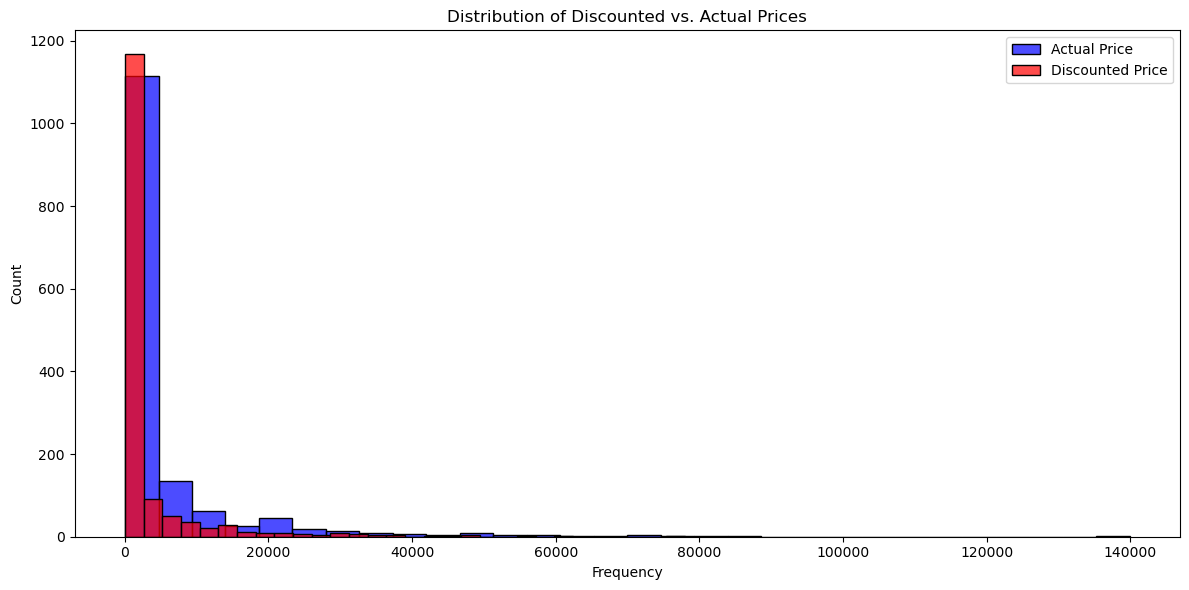

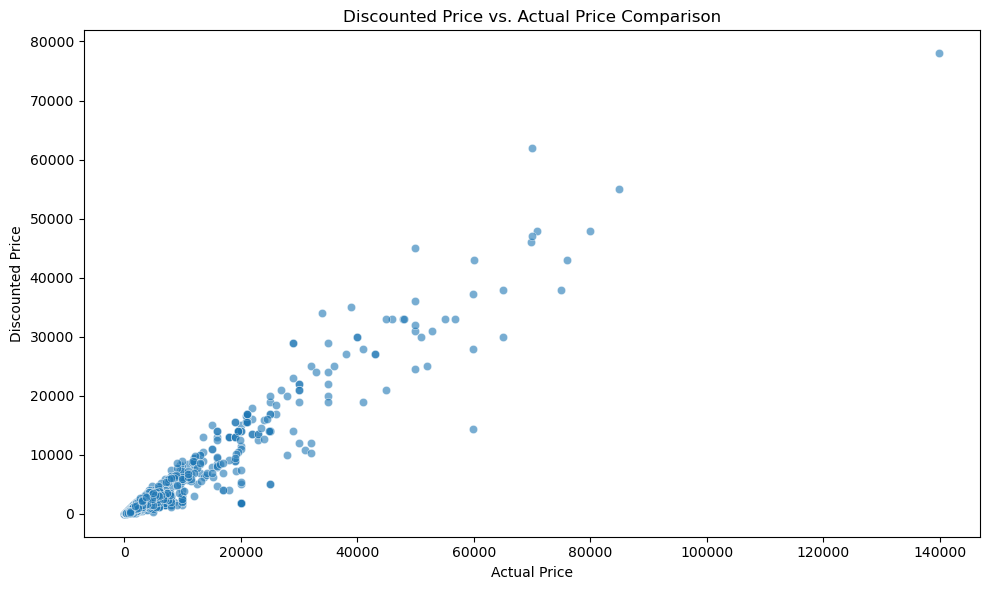

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")
df.columns = df.columns.str.strip()
df["discounted_price"] = df["discounted_price"].astype(str).str.replace("[^\d.]", "", regex=True).astype(float)
df["actual_price"] = df["actual_price"].astype(str).str.replace("[^\d.]", "", regex=True).astype(float)
df_clean = df.dropna(subset=["discounted_price", "actual_price"])
print("Data shape after cleaning:", df_clean.shape)
plt.figure(figsize=(12, 6))
sns.histplot(df_clean["actual_price"], bins=30, color="blue", label="Actual Price", alpha=0.7)
sns.histplot(df_clean["discounted_price"], bins=30, color="red", label="Discounted Price", alpha=0.7)
plt.title("Distribution of Discounted vs. Actual Prices")
plt.xlabel("Frequency")
plt.legend()
plt.tight_layout()
plt.show()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x="actual_price", y="discounted_price", alpha=0.6)
plt.title("Discounted Price vs. Actual Price Comparison")
plt.xlabel("Actual Price")
plt.ylabel("Discounted Price")
plt.tight_layout()
plt.show()


In [27]:
#Q4. How does the average discount percentage vary across categories?

<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_19500\924193410.py:7: SyntaxWarning: invalid escape sequence '\d'
  df["discount_percentage"] = df["discount_percentage"].astype(str).str.replace("[^\d.]", "", regex=True).astype(float)
C:\Users\Admin\AppData\Local\Temp\ipykernel_19500\924193410.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_discount, x="category", y="discount_percentage", palette="coolwarm")
C:\Users\Admin\AppData\Local\Temp\ipykernel_19500\924193410.py:18: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


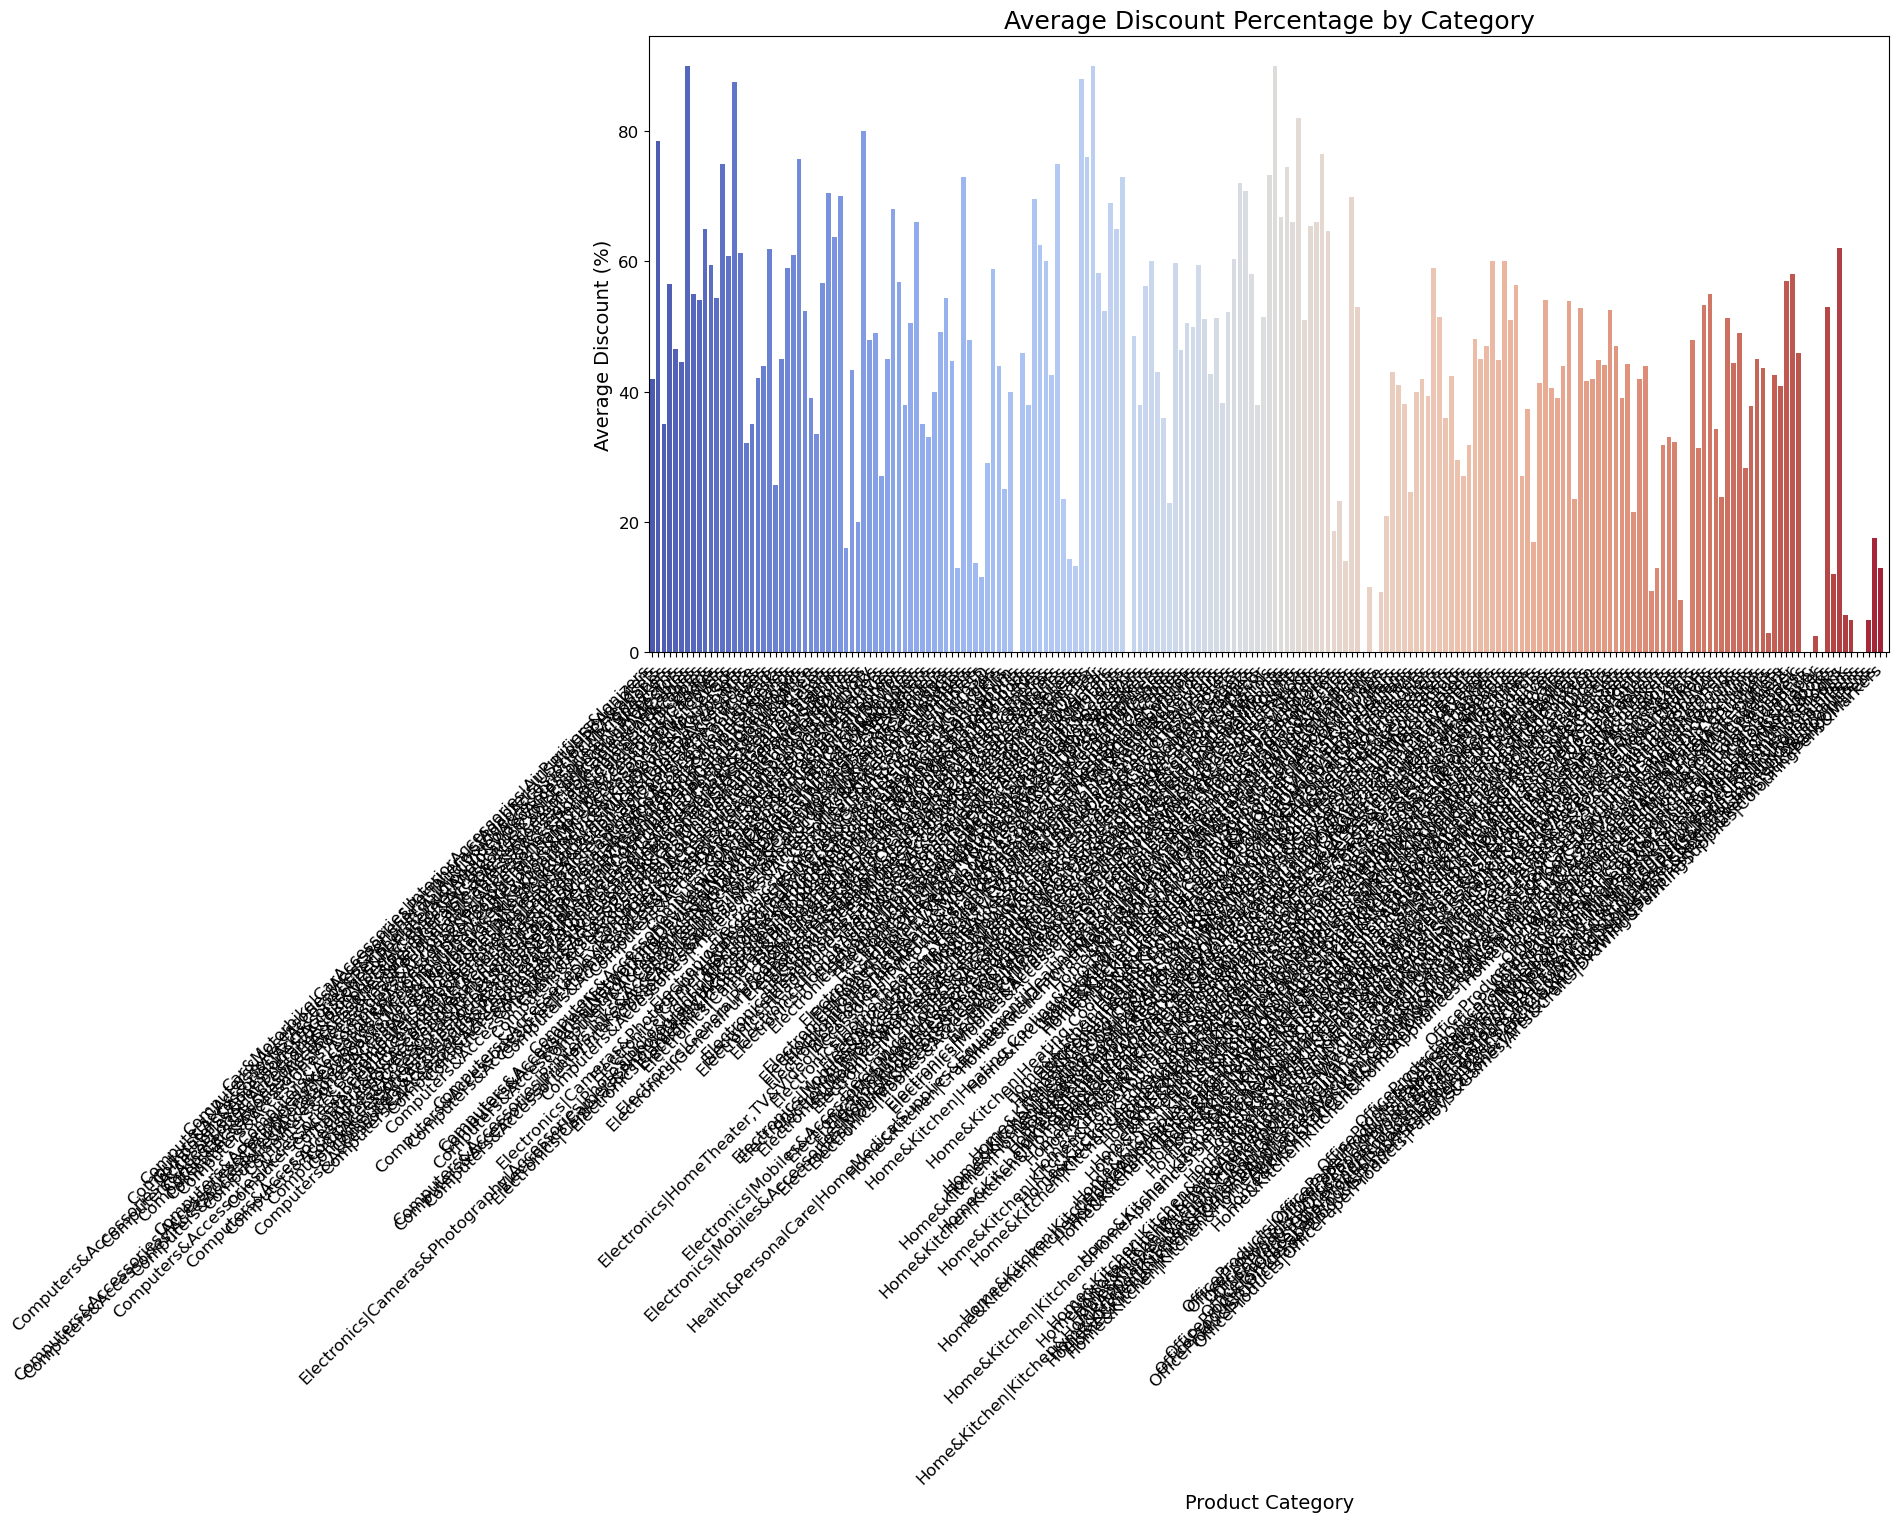

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("amazon.csv")
df.columns = df.columns.str.strip()
df["discount_percentage"] = df["discount_percentage"].astype(str).str.replace("[^\d.]", "", regex=True).astype(float)
df_clean = df.dropna(subset=["category", "discount_percentage"])
avg_discount =  df_clean.groupby("category")["discount_percentage"].mean().reset_index()
avg_discount["discount_percentage"] =  avg_discount["discount_percentage"].round(2)
plt.figure(figsize=(16, 8))
sns.barplot(data=avg_discount, x="category", y="discount_percentage", palette="coolwarm")
plt.title("Average Discount Percentage by Category", fontsize=18)
plt.xlabel("Product Category", fontsize=14)
plt.ylabel("Average Discount (%)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [41]:
#Q5.What are the most popular product names?

In [47]:
import pandas as pd

df = pd.read_csv("amazon.csv")
df.columns = df.columns.str.strip()
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")
df_clean =df.dropna(subset=["product_name", "rating_count"])
top_products = df_clean.sort_values(by="rating_count", ascending=False)
top_products = top_products[["product_name", "category" ,"rating_count", "rating"]]
print(top_products.head(10))
                    

                                           product_name  \
1279  Eureka Forbes car Vac 100 Watts Powerful Sucti...   
750        Eveready Red 1012 AAA Batteries - Pack of 10   
1059  Pigeon 1.5 litre Hot Kettle and Stainless Stee...   
151   Zoul USB Type C Fast Charging 3A Nylon Braided...   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
823   Zoul USB C 60W Fast Charging 3A 6ft/2M Long Ty...   
1272  Bajaj New Shakti Neo Plus 15 Litre 4 Star Rate...   
1259  Hindware Atlantic Xceed 5L 3kW Instant Water H...   
214   Crypo™ Universal Remote Compatible with Tata S...   
1262  iBELL Castor CTEK15L Premium 1.5 Litre Stainle...   

                                               category  rating_count rating  
1279  Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...         992.0      |  
750   Electronics|GeneralPurposeBatteries&BatteryCha...         989.0    4.3  
1059  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...         976.0    3.7  
151   Computers&Accessories|Access

In [50]:
#Q6. What are the most popular product keywords?

In [54]:
import pandas as pd
import re
from collections import Counter

df = pd.read_csv("amazon.csv")
df.columns = df.columns.str.strip()
text_data = df["product_name"].astype(str) + " " + df["about_product"].astype(str)
words = re.findall(r"\b\w+\b", " ".join(text_data))
stopwords = set(["the", "and", "for", "with", "to", "offf", "in", "on", "at", "by", "a", "an", "is", "it", "this", "that"])
filtered_words = [word.lower() for word in words if word.lower() not in stopwords]
word_counts = Counter(filtered_words)
top_keywords = word_counts.most_common(20)
print("Most Popular Product Keywords:")
for keyword, count in top_keywords:
    print(f"{keyword}: {count}")

Most Popular Product Keywords:
of: 2207
your: 1882
1: 1798
usb: 1647
you: 1356
cable: 1333
2: 1292
or: 986
c: 954
3: 950
can: 921
charging: 909
type: 876
warranty: 814
from: 792
up: 755
5: 679
high: 671
power: 654
devices: 639


In [2]:
#Q7.What are the most popular product reviews?

In [6]:
import pandas as pd

df = pd.read_csv("amazon.csv")
df.columns = df.columns.str.strip()
df["rating_count"] = pd.to_numeric(df["rating_count"], errors="coerce")
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df_clean = df.dropna(subset=["review_title", "review_content", "rating", "rating_count", "product_name"])
popular_reviews = df_clean.sort_values(by=["rating_count", "rating"], ascending=False)
top_reviews = popular_reviews[["product_name", "review_content", "rating", "rating_count"]].head(10)
pd.set_option("display.max_colwidth", 200)
print(top_reviews)

                                                                                                                                                                                      product_name  \
750                                                                                                                                                   Eveready Red 1012 AAA Batteries - Pack of 10   
1059     Pigeon 1.5 litre Hot Kettle and Stainless Steel Water Bottle Combo used for boiling Water, Making Tea and Coffee, Instant Noodles, Soup, 1500 Watt with Auto Shut- off Feature - (Silver)   
32    Zoul USB C 60W Fast Charging 3A 6ft/2M Long Type C Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31S M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (2M, Grey)   
151                     Zoul USB Type C Fast Charging 3A Nylon Braided Data Cable Quick Charger Cable QC 3.0 for Samsung Galaxy M31s M30 S10 S9 S20 Plus, Note 10 9 8, A20e A40 A50 A70 (1M, Grey)   
823   Zoul

In [10]:
#Q8. What is the correlation between discounted_price and rating?

In [14]:
import pandas as pd

df = pd.read_csv("amazon.csv")
df.columns = df.columns.str.strip()
df["discounted_price"] = df["discounted_price"].astype(str).str.replace("[^\d.]", "", regex=True).astype(float)
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df_clean = df.dropna(subset=["discounted_price", "rating"])
correlation = df_clean["discounted_price"].corr(df_clean["rating"])
print(f"Correlation between discounted_price and rating: {correlation:.2f}")

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\3137309914.py:5: SyntaxWarning: invalid escape sequence '\d'
  df["discounted_price"] = df["discounted_price"].astype(str).str.replace("[^\d.]", "", regex=True).astype(float)


Correlation between discounted_price and rating: 0.12


In [19]:
#Q9. What are the Top 5 categories based on the highest ratings?

In [25]:
import pandas as pd

df = pd.read_csv("amazon.csv")
df.columns = df.columns.str.strip()
df["rating"] = pd.to_numeric(df["rating"], errors="coerce")
df_clean = df.dropna(subset=["category", "rating"])
avg_rating = df_clean.groupby("category")["rating"].mean().reset_index()
avg_rating["rating"] = avg_rating["rating"].round(2)
top5_categories = avg_rating.sort_values(by="rating", ascending=False).head(5)
print("Top 5 Categories by Average Rating:")
print(top5_categories)


Top 5 Categories by Average Rating:
                                                                                       category  \
57                                                                Computers&Accessories|Tablets   
196                                          OfficeProducts|OfficeElectronics|Calculators|Basic   
175  Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|SmallApplianceParts&Accessories   
148                       Home&Kitchen|Kitchen&HomeAppliances|Coffee,Tea&Espresso|CoffeePresses   
48                     Computers&Accessories|NetworkingDevices|NetworkAdapters|PowerLANAdapters   

     rating  
57      4.6  
196     4.5  
175     4.5  
148     4.5  
48      4.5  


In [28]:
#Q10. Identify any potential areas for improvement or optimization based on the data analysis.

In [30]:
#Product Optimization

#- Best-selling products: Analyze top-selling products to understand 
#consumer demand and preferences.
#- Product pricing: Determine the optimal price range for products 
#to maximize sales and revenue.
#- SEO optimization: Identify effective SEO titles and keywords that
#generate the most sales.

#Customer Sentiment Analysis

#- Review analysis: Examine customer reviews and ratings to understand
#product strengths and weaknesses.
#- Sentiment trends: Identify trends in customer sentiment to inform 
#product development and improvement.

#Delivery and Logistics Optimization

#- Delivery efficiency: Analyze factors influencing delivery efficiency,
#such as shipping times, costs, and logistics.
#- Area-specific optimization: Identify areas for optimization in delivery
#processes to improve customer satisfaction.

#Product Ratings and Reviews

#- Ratings analysis: Examine product ratings to identify areas for
#improvement in product quality or customer service.
#- Review-based feedback: Use customer reviews to gather feedback 
#and suggestions for product improvement.

#By analyzing these areas, you can gain valuable insights into consumer
#behavior, product performance, and operational efficiency, ultimately
#informing data-driven decisions to drive business growth and improvement.

In [113]:
#EDA-4 (Spotify)

In [34]:
#Q1. Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

In [38]:
import pandas as pd

df= pd.read_csv("spotify.csv")
df.columns = df.columns.str.strip()
missing_values = df.isnull().sum()
print("\nMissing Values:\n", missing_values)
df_clean = df.dropna()
duplicate_rows = df_clean.duplicated().sum()
print("\nDuplicate Rows Found:", duplicate_rows)
df_clean = df_clean.drop_duplicates()
print("\nDataframe Shape After Cleaning:", df_clean.shape)


Missing Values:
 Artist           0
Track Name       0
Popularity       0
Duration (ms)    0
Track ID         0
dtype: int64

Duplicate Rows Found: 27

Dataframe Shape After Cleaning: (413, 5)


In [41]:
#Q2. What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.

C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\3349755637.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.coumns = df.columns.str.strip()


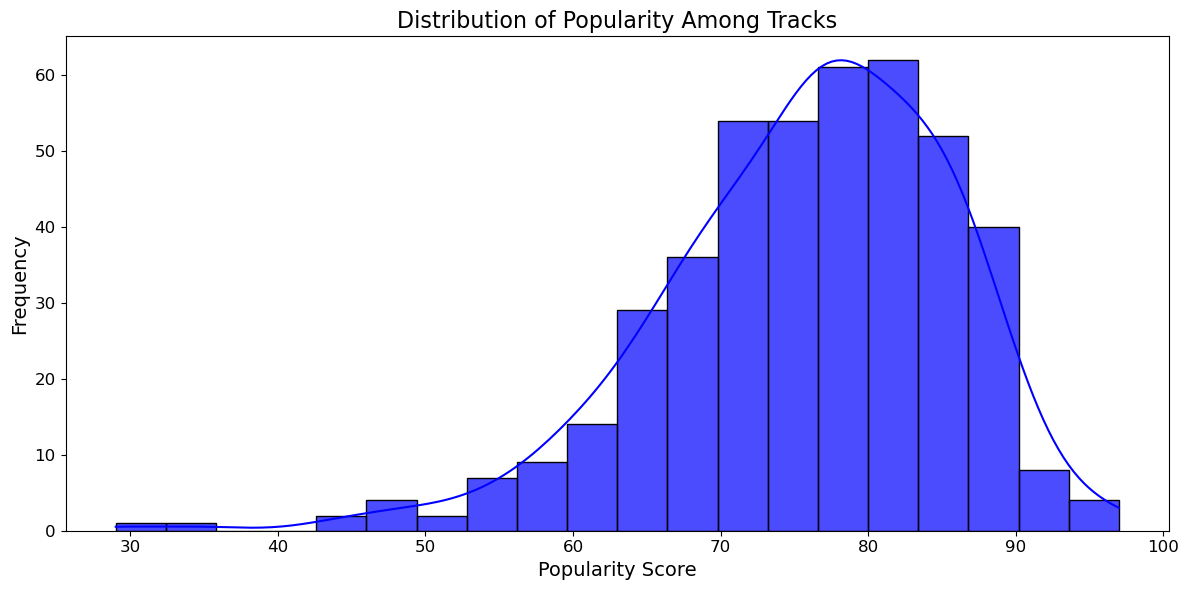

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")
df.coumns = df.columns.str.strip()
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df_clean = df.dropna(subset=["Popularity"])
plt.figure(figsize=(12, 6))
sns.histplot(df_clean["Popularity"], bins=20, color="blue", alpha=0.7, kde=True)
plt.title("Distribution of Popularity Among Tracks", fontsize=16)
plt.xlabel("Popularity Score", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [50]:
#Q3. Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot?

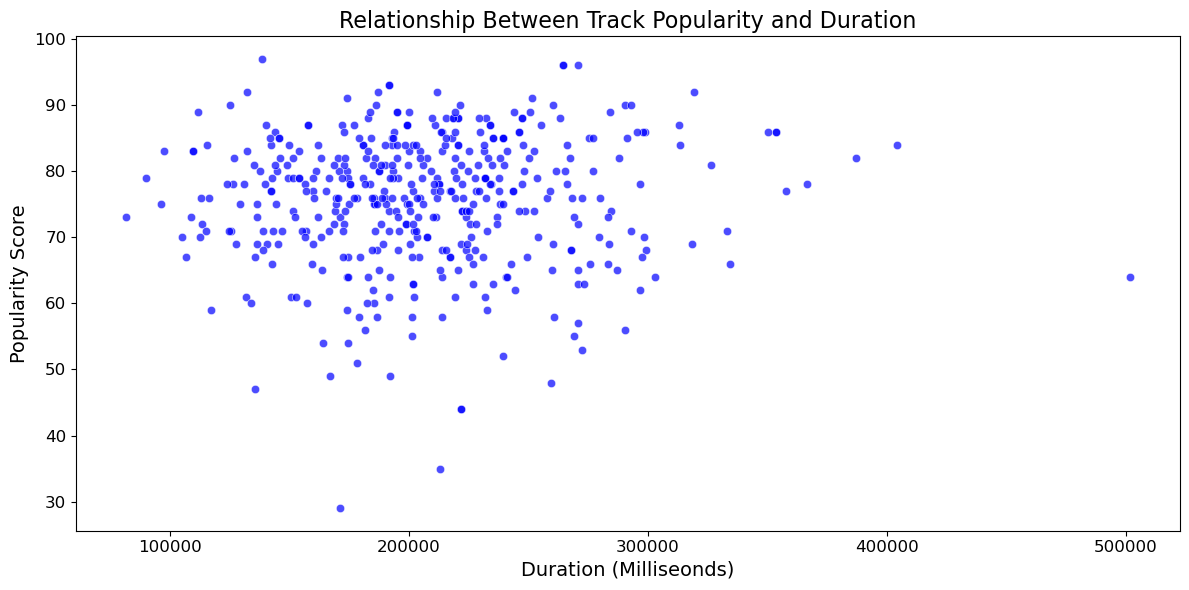

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("spotify.csv")
df.columns = df.columns.str.strip()
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df["Duration (ms)"] = pd.to_numeric(df["Duration (ms)"], errors="coerce")
df_clean = df.dropna(subset=["Popularity", "Duration (ms)"])
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_clean, x="Duration (ms)", y="Popularity", alpha=0.7, color="blue")
plt.title("Relationship Between Track Popularity and Duration", fontsize=16)
plt.xlabel("Duration (Milliseonds)", fontsize=14)
plt.ylabel("Popularity Score", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

In [55]:
#Q4.Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist using a countplot

C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\3693115375.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="Artist", order=df["Artist"].value_counts().index, palette="coolwarm")


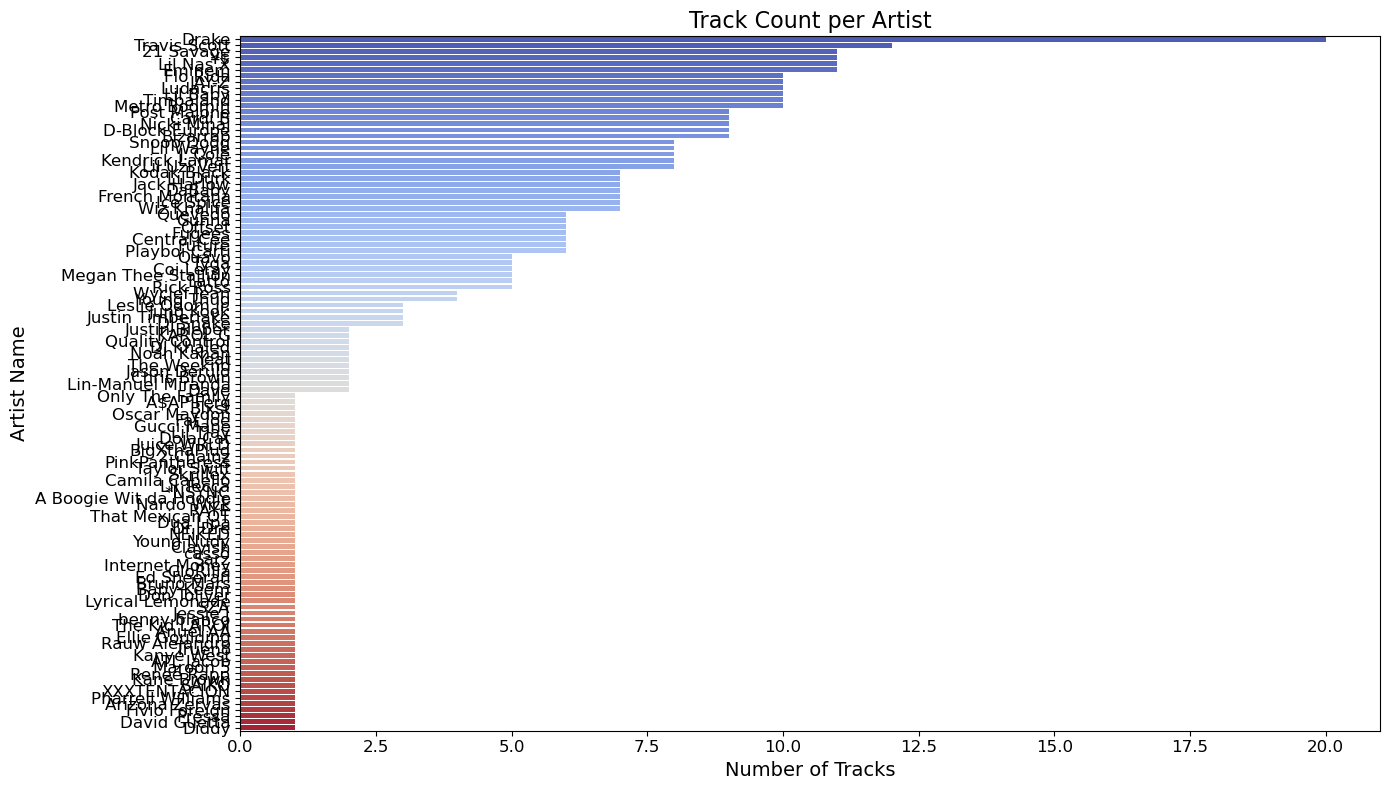

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")
df.columns = df.columns.str.strip()
artist_counts = df["Artist"].value_counts().reset_index()
artist_counts.columns = ["Artist", "Track Count"]
plt.figure(figsize=(14, 8))
sns.countplot(data=df, y="Artist", order=df["Artist"].value_counts().index, palette="coolwarm")
plt.title("Track Count per Artist", fontsize=16)
plt.xlabel("Number of Tracks", fontsize=14)
plt.ylabel("Artist Name", fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()



In [62]:
#Q5. What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

In [70]:
import pandas as pd

df = pd.read_csv("spotify.csv")
df.columns = df.columns.str.strip()
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df_clean = df.dropna(subset=["Popularity"])
least_popular_tracks = df_clean.sort_values(by="Popularity", ascending=True).head(5)
least_popular_tracks = least_popular_tracks[["Artist", "Track Name", "Popularity"]]
print("Top 5 Least Popular Tracks:")
print(least_popular_tracks)

Top 5 Least Popular Tracks:
             Artist                     Track Name  Popularity
207          Pressa  Attachments (feat. Coi Leray)          29
231   Justin Bieber                     Intentions          35
435  French Montana                Splash Brothers          44
413  French Montana                Splash Brothers          44
225        Lil Baby                  On Me - Remix          47


In [73]:
#Q6. Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist

In [75]:
import pandas as pd

df = pd.read_csv("spotify.csv")
df.columns = df.columns.str.strip()
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df_clean = df.dropna(subset=["Popularity"])
artist_avg_popularity = df_clean.groupby("Artist")["Popularity"].mean().reset_index()
artist_avg_popularity = artist_avg_popularity.sort_values(by="Popularity", ascending=False)
top5_artists = artist_avg_popularity.head(5)
print("Top 5 Most Popular Artists by Average Popularity:")
print(top5_artists)

Top 5 Most Popular Artists by Average Popularity:
           Artist  Popularity
113         cassö   92.000000
104        Trueno   89.000000
24   David Guetta   87.000000
103  Travis Scott   87.000000
114            ¥$   86.090909


In [78]:
#Q7. For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

In [84]:
import pandas as pd

df = pd.read_csv("spotify.csv")
df.columns = df.columns.str.strip()
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df_clean = df.dropna(subset=["Popularity"])
artist_avg_popularity = df_clean.groupby("Artist")["Popularity"].mean().reset_index()
top5_artists = artist_avg_popularity.sort_values(by="Popularity", ascending=False).head(5)["Artist"]
top_tracks = df_clean[df_clean["Artist"].isin(top5_artists)].sort_values(by=["Artist", "Popularity"], ascending=[True, False])
most_popular_tracks = top_tracks.groupby("Artist").first().reset_index()
result = most_popular_tracks[["Artist", "Track Name", "Popularity"]]
print("Most Popular Tracks for Top 5 Artists:")
print(result)                                

Most Popular Tracks for Top 5 Artists:
         Artist                    Track Name  Popularity
0  David Guetta            Baby Don't Hurt Me          87
1  Travis Scott    FE!N (feat. Playboi Carti)          93
2        Trueno  Mamichula - con Nicki Nicole          89
3         cassö                         Prada          92
4            ¥$                      CARNIVAL          96


In [87]:
#Q8.Visualize relationships between multiple numerical variables simultaneously using a pair plot.

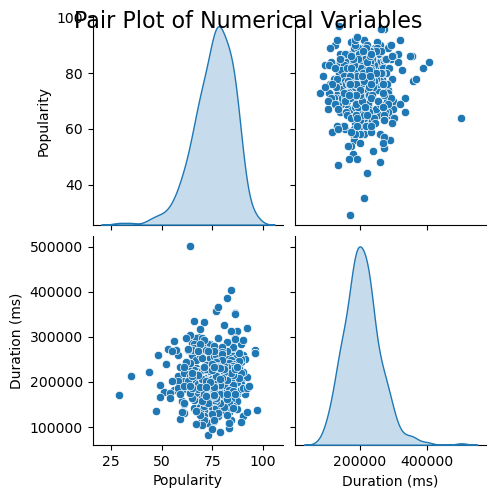

In [91]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")
df.columns = df.columns.str.strip()
num_columns = ["Popularity", "Duration (ms)"]
df[num_columns] = df[num_columns].apply(pd.to_numeric, errors="coerce")
df_clean = df.dropna(subset=num_columns)
sns.pairplot(df_clean[num_columns], diag_kind="kde")
plt.suptitle("Pair Plot of Numerical Variables", fontsize=16)
plt.show()                             

In [94]:
#Q9.Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot

C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\4137619404.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_filtered, x="Artist", y="Duration (ms)", palette="coolwarm")


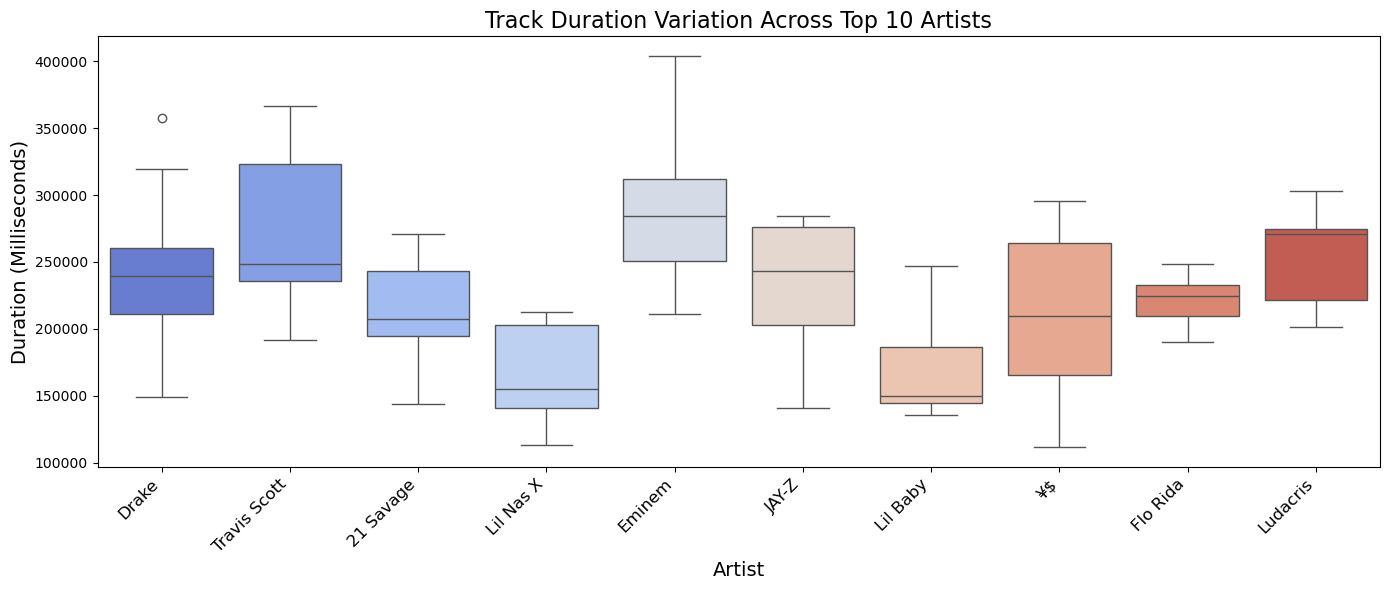

In [102]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")
df.columns = df.columns.str.strip()
df["Duration (ms)"] = pd.to_numeric(df["Duration (ms)"], errors="coerce")
df_clean = df.dropna(subset=["Artist", "Duration (ms)"])
top_artists = df_clean["Artist"].value_counts().index[:10]
df_filtered = df_clean[df_clean["Artist"].isin(top_artists)]
plt.figure(figsize=(14, 6))
sns.boxplot(data=df_filtered, x="Artist", y="Duration (ms)", palette="coolwarm")
plt.title("Track Duration Variation Across Top 10 Artists", fontsize=16)
plt.xlabel("Artist", fontsize=14)
plt.ylabel("Duration (Milliseconds)", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

In [105]:
#Q10. How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.

C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\2472403101.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_filtered, x="Artist", y="Popularity", palette="coolwarm")


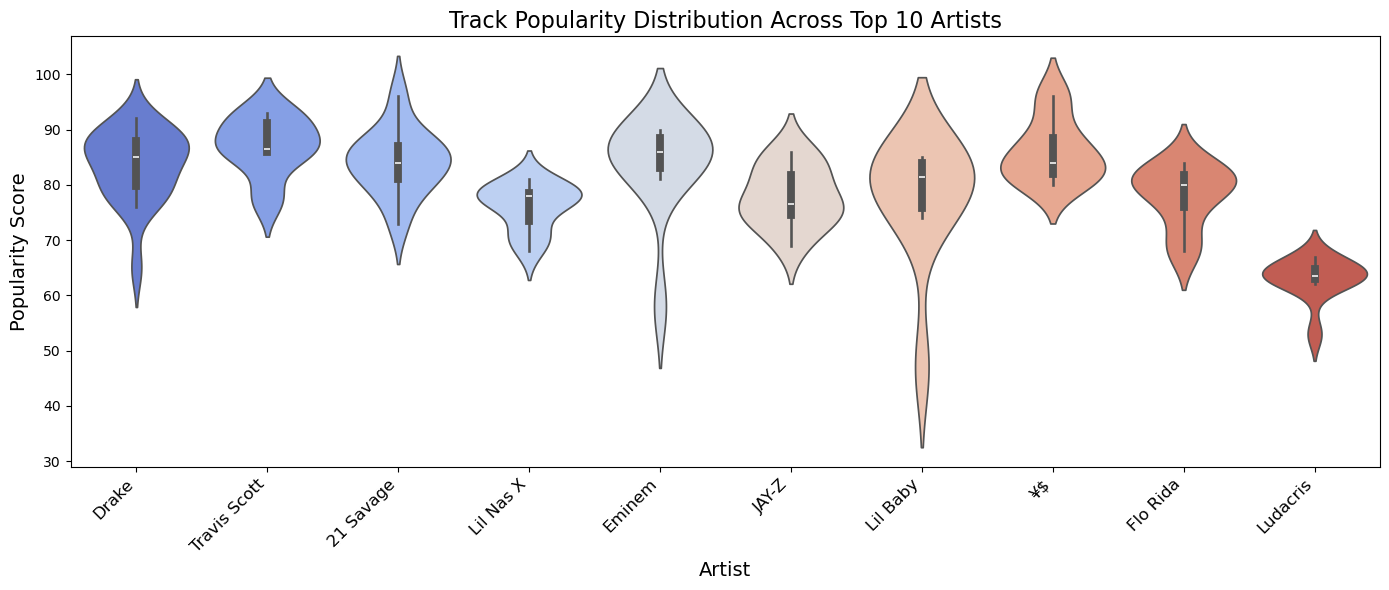

C:\Users\Admin\AppData\Local\Temp\ipykernel_19228\2472403101.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.swarmplot(data=df_filtered, x="Artist", y="Popularity", palette="coolwarm", alpha=0.7)


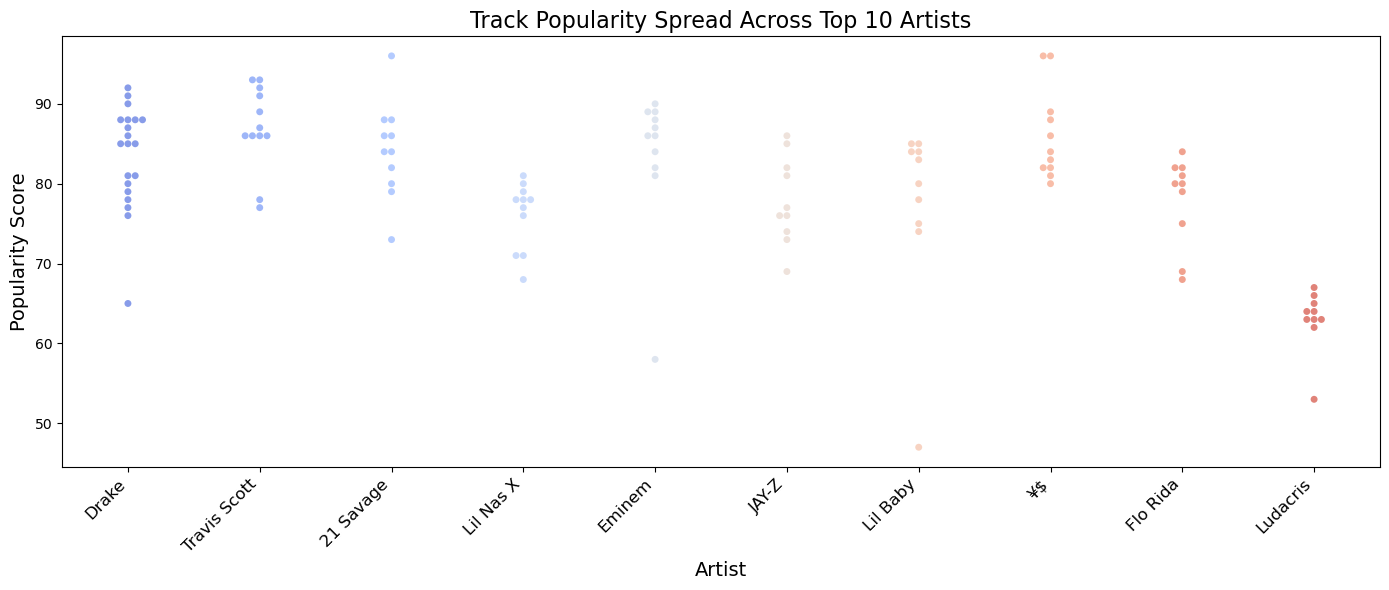

In [111]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("spotify.csv")
df.columns =df.columns.str.strip()
df["Popularity"] = pd.to_numeric(df["Popularity"], errors="coerce")
df_clean = df.dropna(subset=["Artist", "Popularity"])
top_artists =  df_clean["Artist"].value_counts().index[:10]
df_filtered = df_clean[df_clean["Artist"].isin(top_artists)]
plt.figure(figsize=(14, 6))
sns.violinplot(data=df_filtered, x="Artist", y="Popularity", palette="coolwarm")
plt.title("Track Popularity Distribution Across Top 10 Artists", fontsize=16)
plt.xlabel("Artist", fontsize=14)
plt.ylabel("Popularity Score", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.swarmplot(data=df_filtered, x="Artist", y="Popularity", palette="coolwarm", alpha=0.7)
plt.title("Track Popularity Spread Across Top 10 Artists", fontsize=16)
plt.xlabel("Artist", fontsize=14)
plt.ylabel("Popularity Score", fontsize=14)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.tight_layout()
plt.show()